In [1]:
# Import some libraries

import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
#from matplotlib.plot_lib import set_default


In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

set_default(figsize=(15, 4))

In [3]:
# Convert vector to image

def to_img(y):
    y = 0.5 * (y + 1)
    y = y.view(y.size(0), 28, 28)
    return y

In [4]:
# Displaying routine

def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [5]:
# Define data loading step

batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
# Define model architecture and reconstruction loss

# n = 28 x 28 = 784
d = 30  # for standard AE (under-complete hidden layer)
# d = 500  # for denoising AE (over-complete hidden layer)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, y):
        h = self.encoder(y)
        ỹ = self.decoder(h)
        return ỹ
    
ae = Autoencoder().to(device)
criterion = nn.MSELoss()

In [8]:
# Configure the optimiser

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    ae.parameters(),
    lr=learning_rate,
)

*Comment* or *un-comment out* a few lines of code to seamlessly switch between *standard AE* and *denoising one*.

Don't forget to **(1)** change the size of the hidden layer accordingly, **(2)** re-generate the model, and **(3)** re-pass the parameters to the optimiser.

epoch [1/20], loss:0.2116
epoch [2/20], loss:0.1484
epoch [3/20], loss:0.1248
epoch [4/20], loss:0.1056
epoch [5/20], loss:0.0941
epoch [6/20], loss:0.0894
epoch [7/20], loss:0.0866
epoch [8/20], loss:0.0887
epoch [9/20], loss:0.0768
epoch [10/20], loss:0.0697
epoch [11/20], loss:0.0724
epoch [12/20], loss:0.0694
epoch [13/20], loss:0.0693
epoch [14/20], loss:0.0696
epoch [15/20], loss:0.0639
epoch [16/20], loss:0.0628
epoch [17/20], loss:0.0660
epoch [18/20], loss:0.0641
epoch [19/20], loss:0.0589
epoch [20/20], loss:0.0619


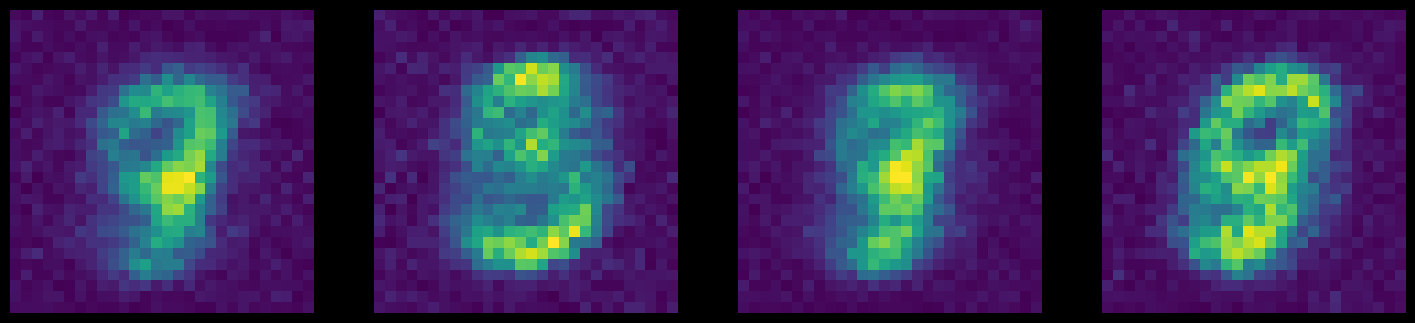

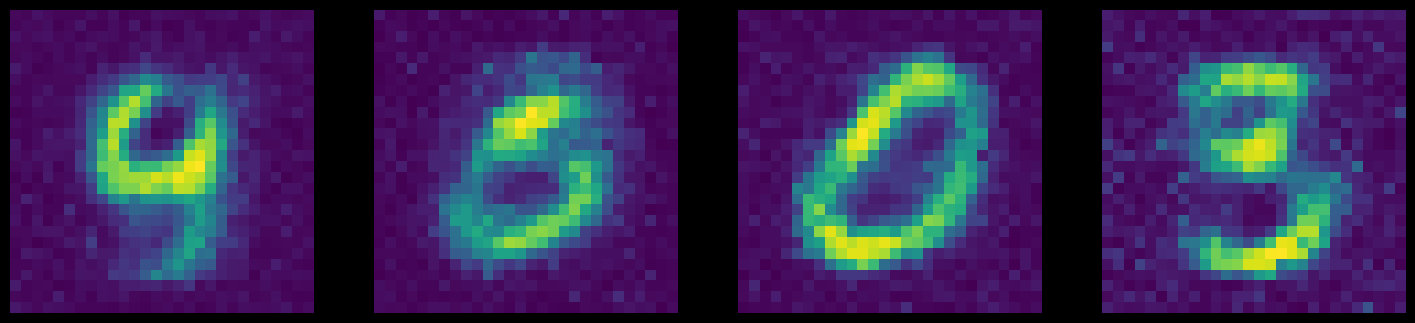

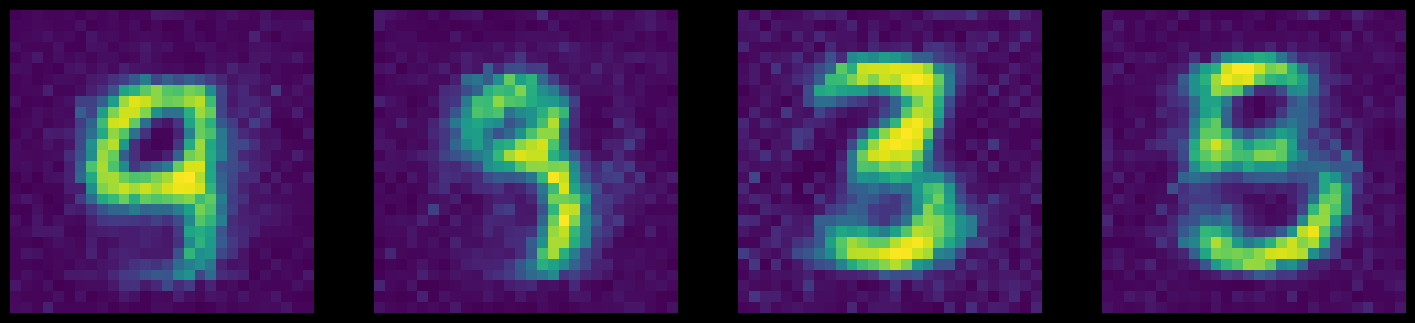

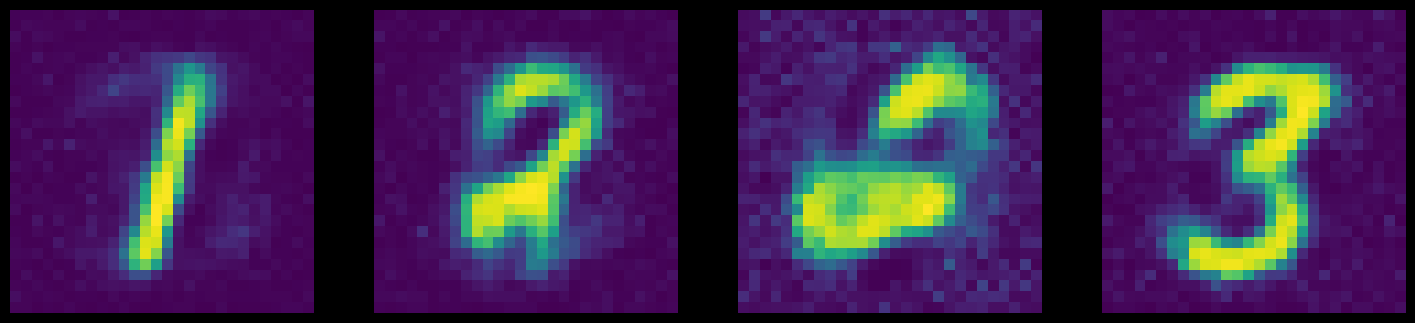

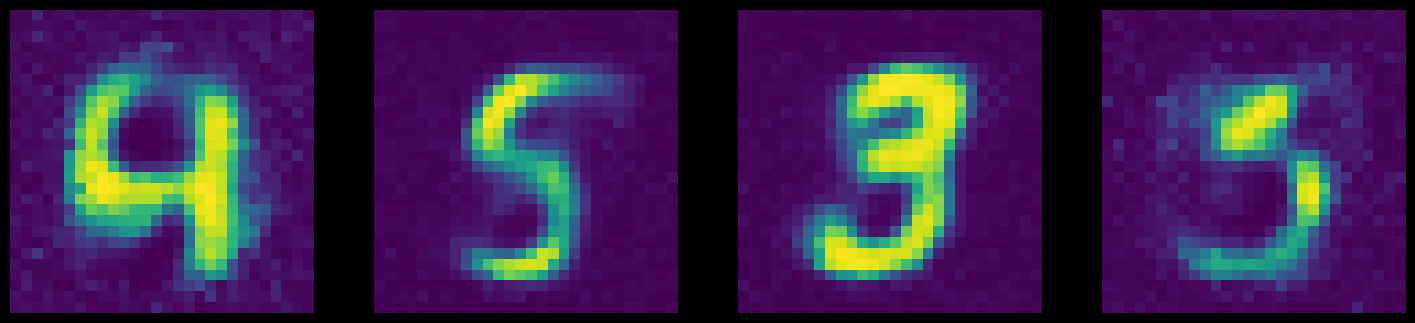

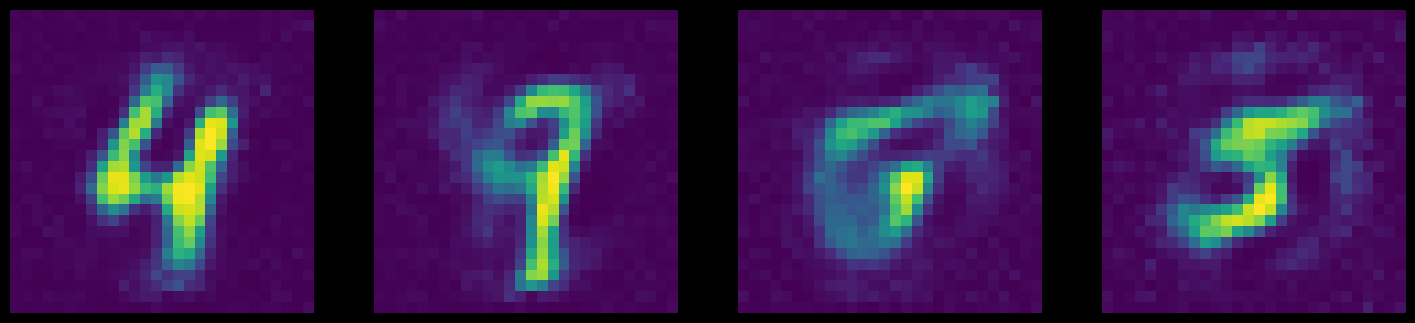

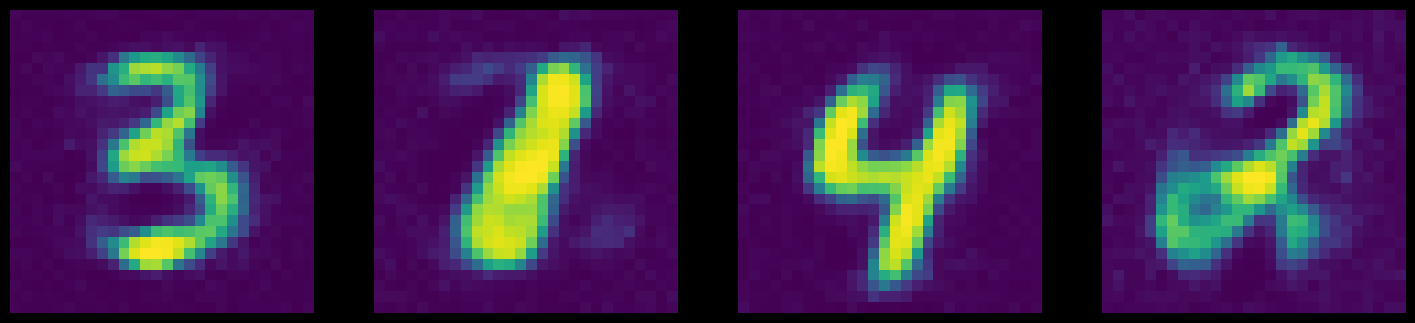

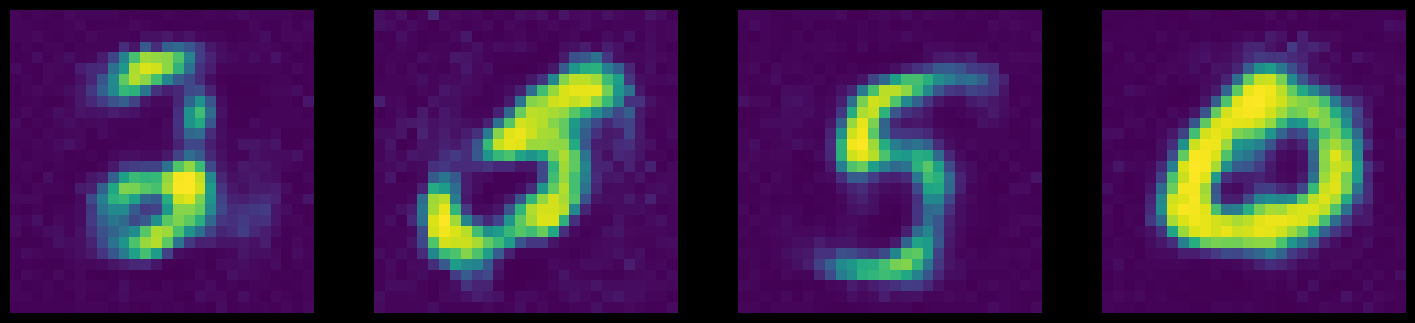

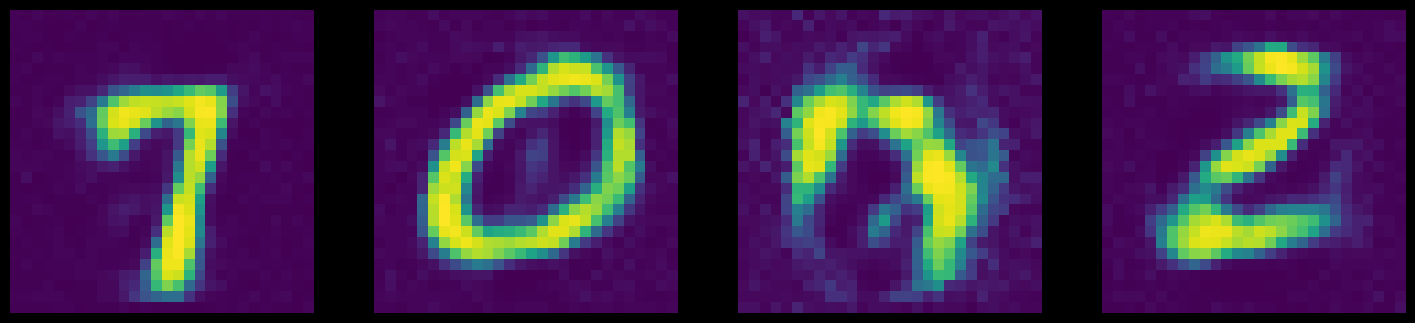

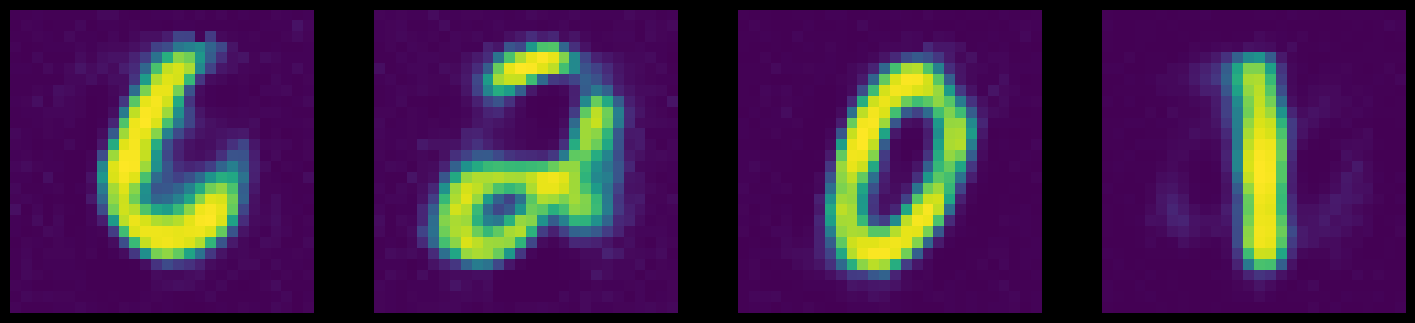

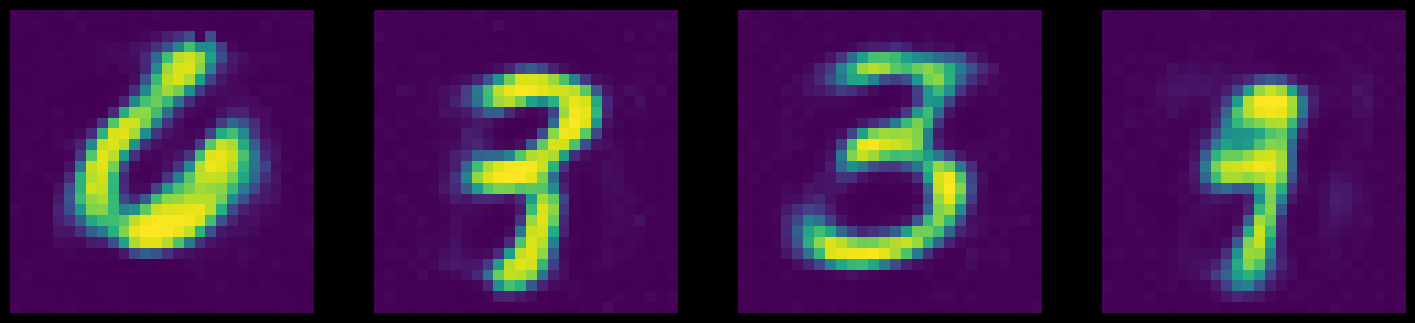

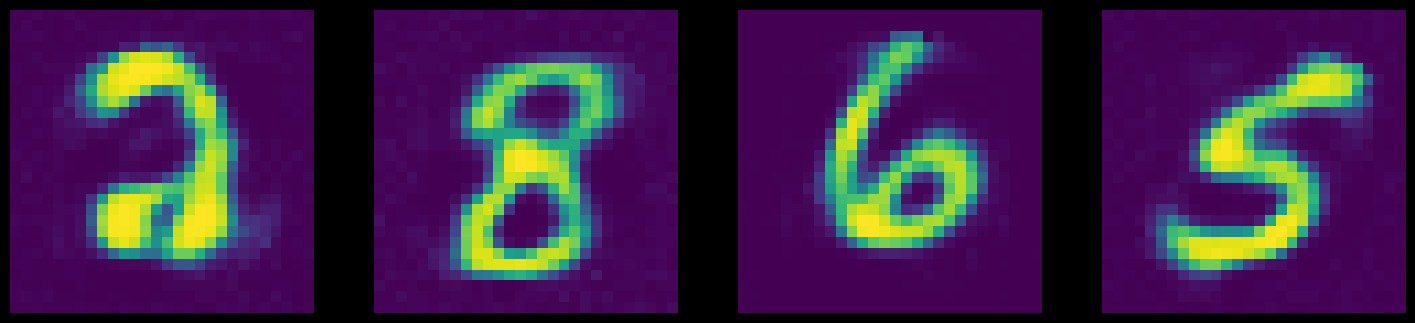

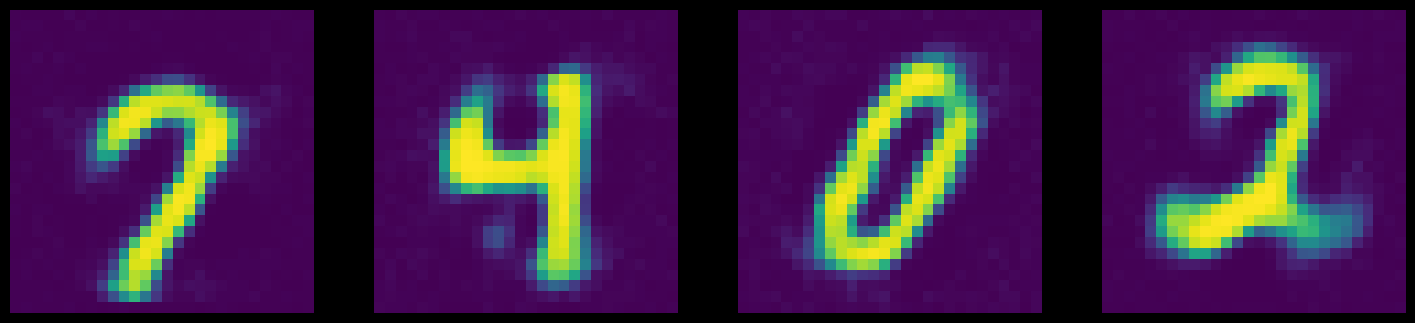

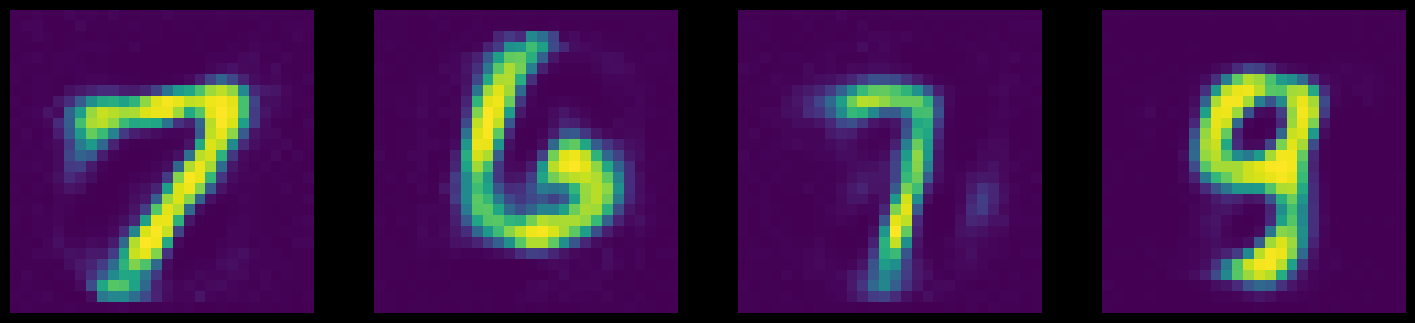

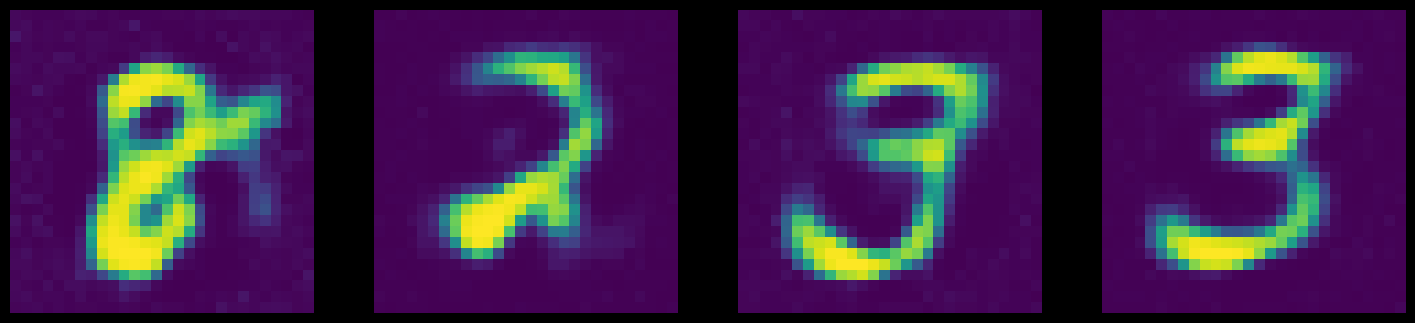

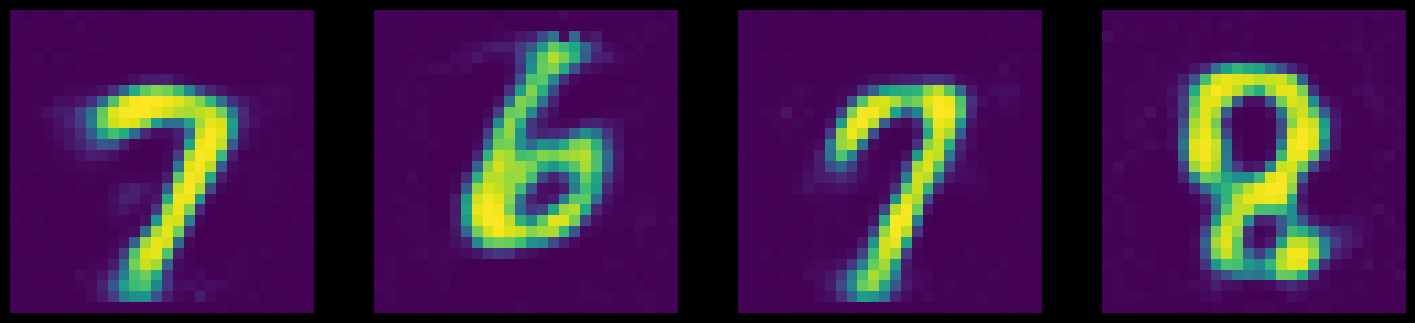

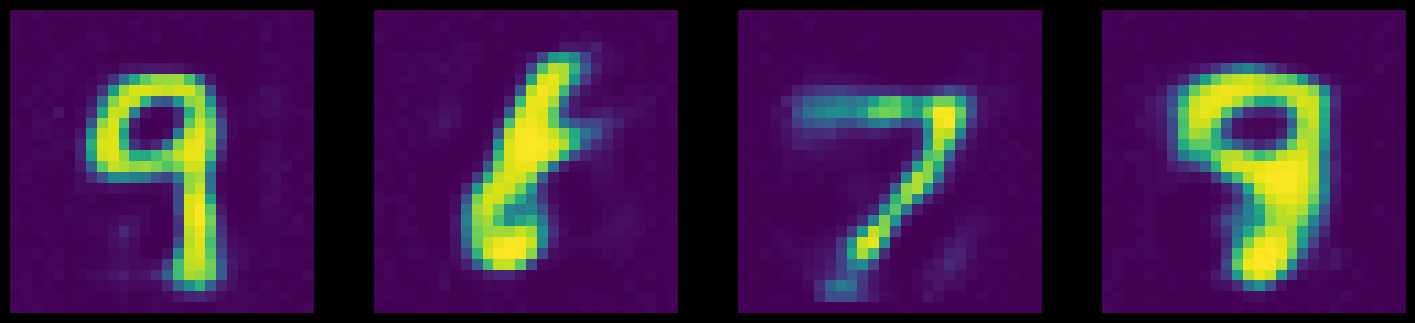

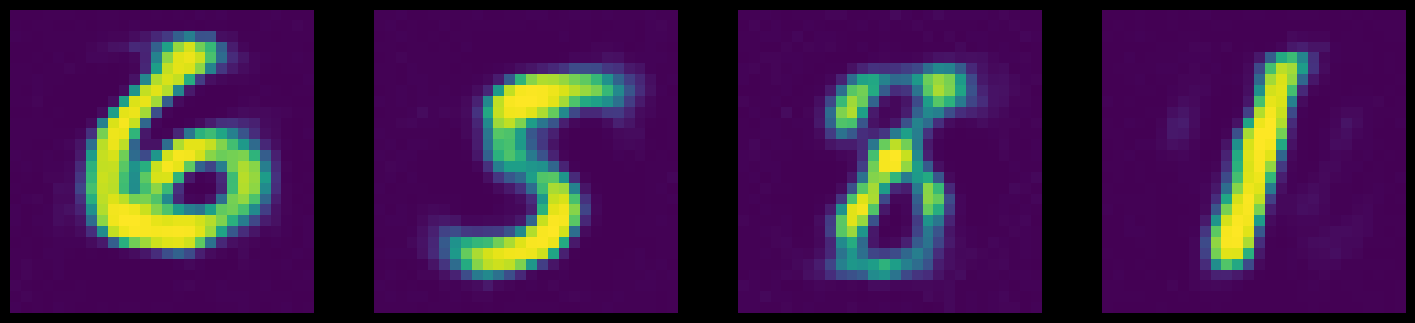

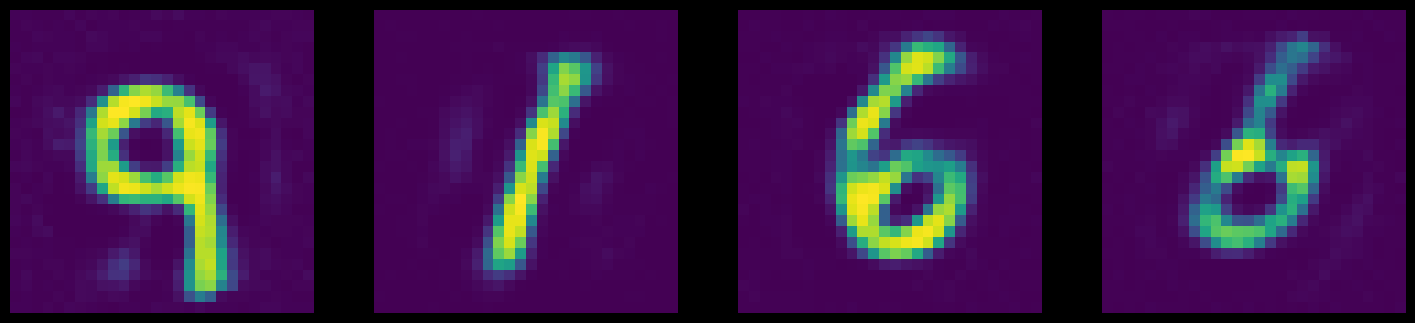

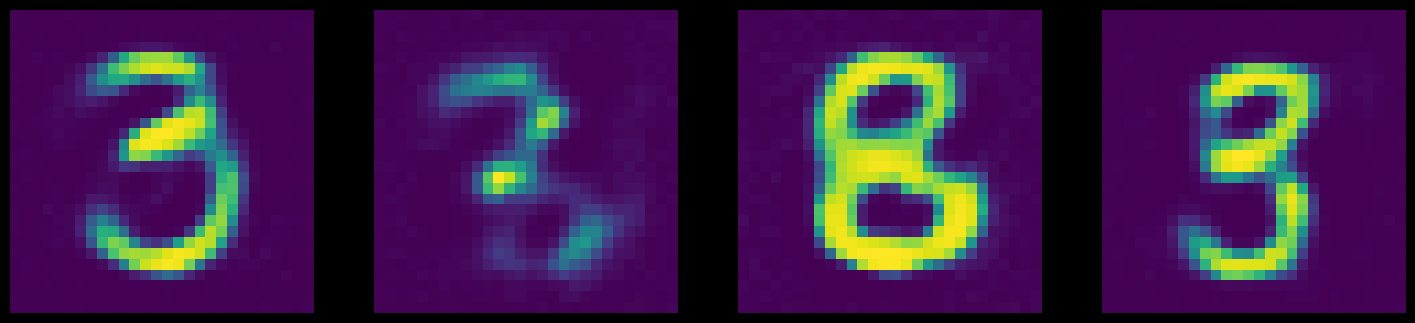

In [9]:
# Train standard or denoising autoencoder (AE)

num_epochs = 20
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        # noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = ae(img)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

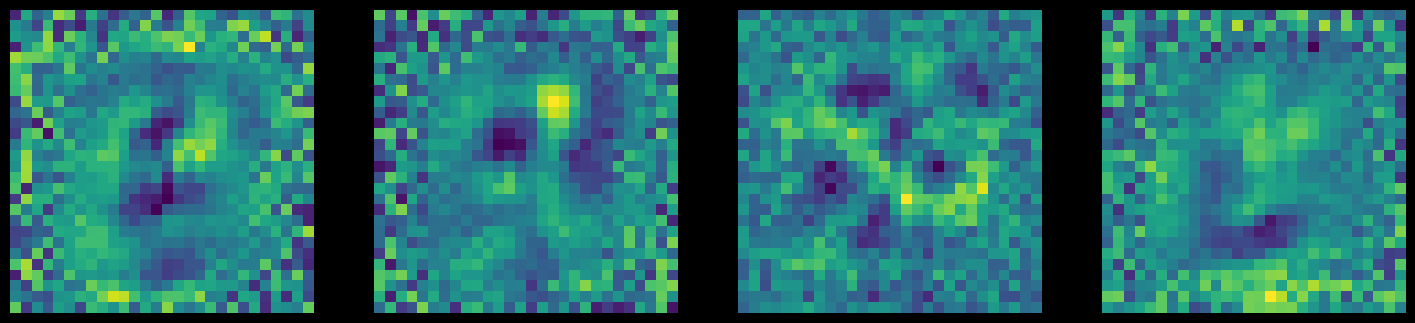

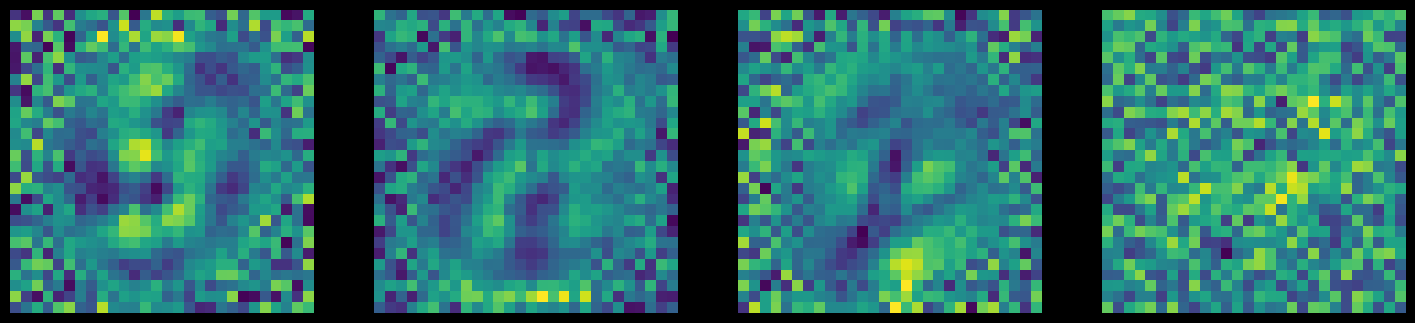

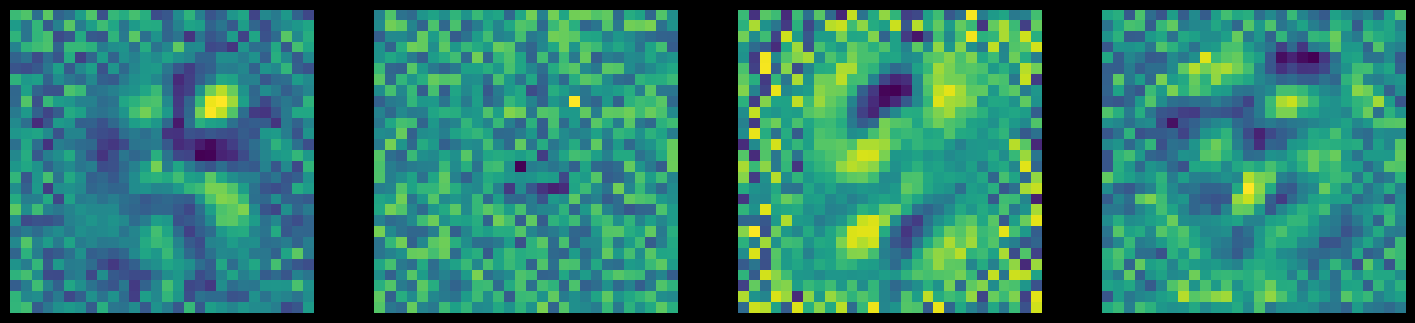

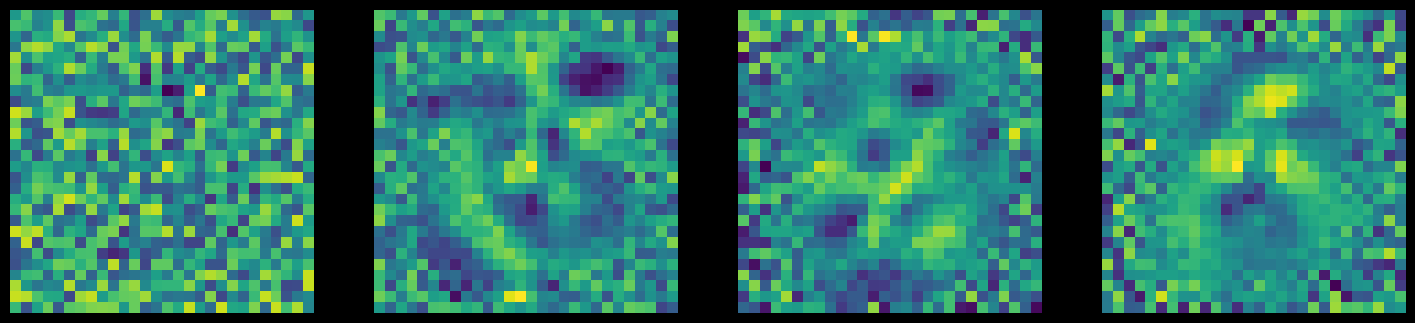

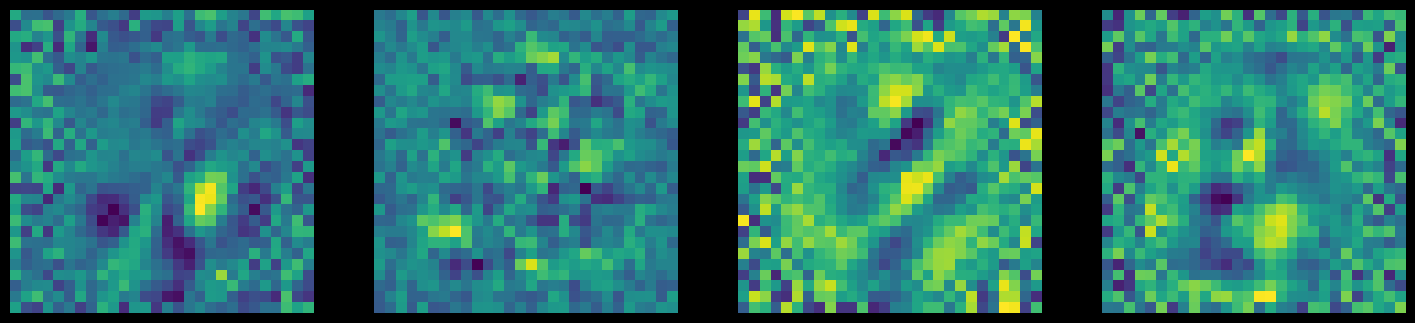

In [10]:
# Visualise a few kernels of the encoder

display_images(None, ae.encoder[0].weight, 5)

In [11]:
# Define model architecture and reconstruction loss

# n = 28 x 28 = 784
# d = 30  # for standard AE (under-complete hidden layer)
d = 500  # for denoising AE (over-complete hidden layer)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, y):
        h = self.encoder(y)
        ỹ = self.decoder(h)
        return ỹ
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [12]:
# Configure the optimiser

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

*Comment* or *un-comment out* a few lines of code to seamlessly switch between *standard AE* and *denoising one*.

Don't forget to **(1)** change the size of the hidden layer accordingly, **(2)** re-generate the model, and **(3)** re-pass the parameters to the optimiser.

epoch [1/20], loss:0.0751
epoch [2/20], loss:0.0574
epoch [3/20], loss:0.0582
epoch [4/20], loss:0.0508
epoch [5/20], loss:0.0513
epoch [6/20], loss:0.0466
epoch [7/20], loss:0.0462
epoch [8/20], loss:0.0463
epoch [9/20], loss:0.0464
epoch [10/20], loss:0.0453
epoch [11/20], loss:0.0433


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


epoch [12/20], loss:0.0436
epoch [13/20], loss:0.0406
epoch [14/20], loss:0.0426
epoch [15/20], loss:0.0419
epoch [16/20], loss:0.0430
epoch [17/20], loss:0.0388
epoch [18/20], loss:0.0401
epoch [19/20], loss:0.0416
epoch [20/20], loss:0.0411


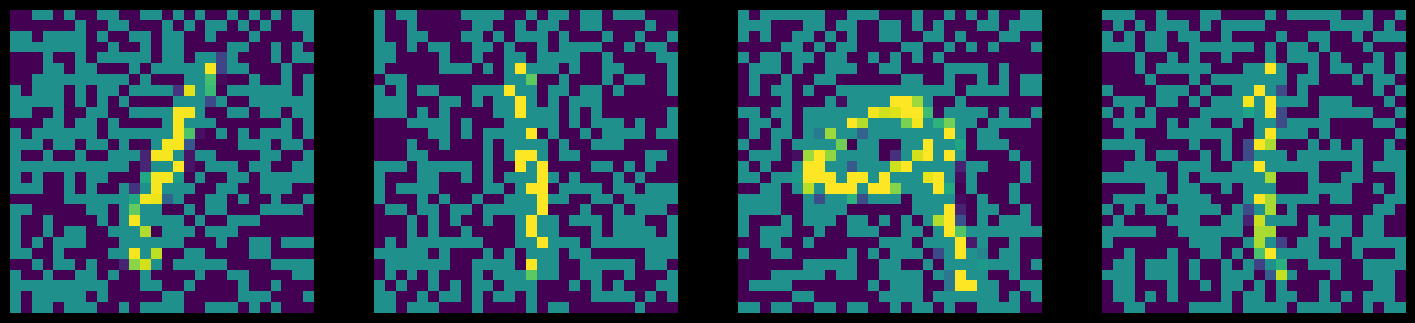

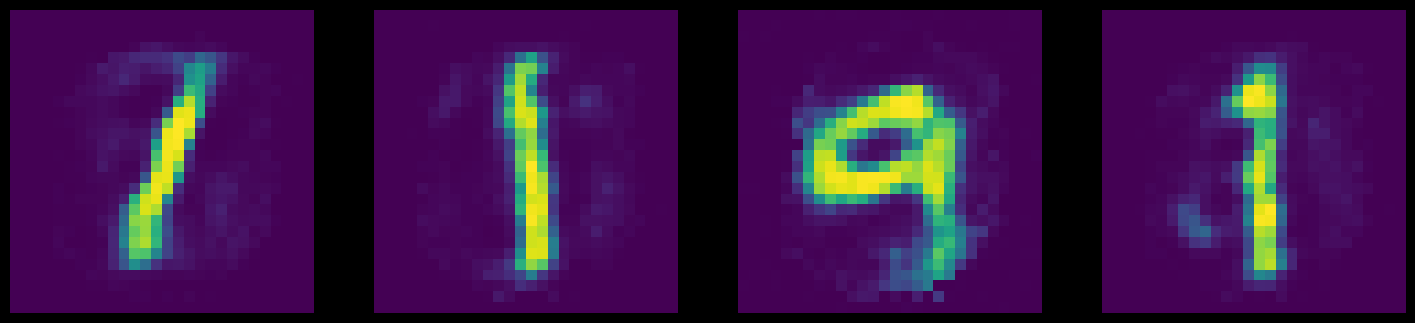

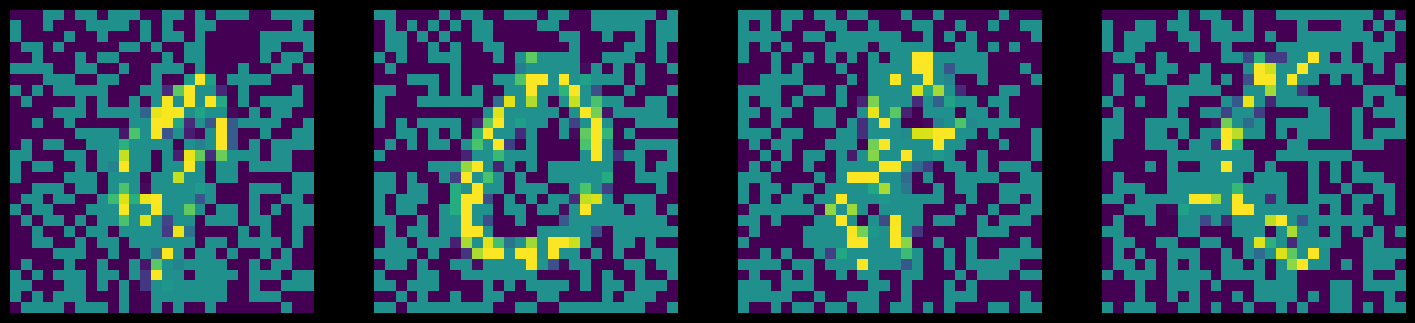

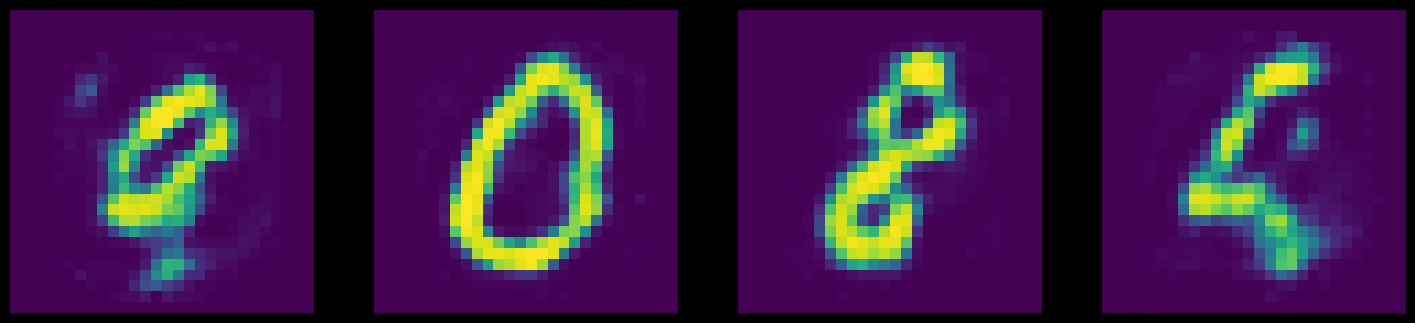

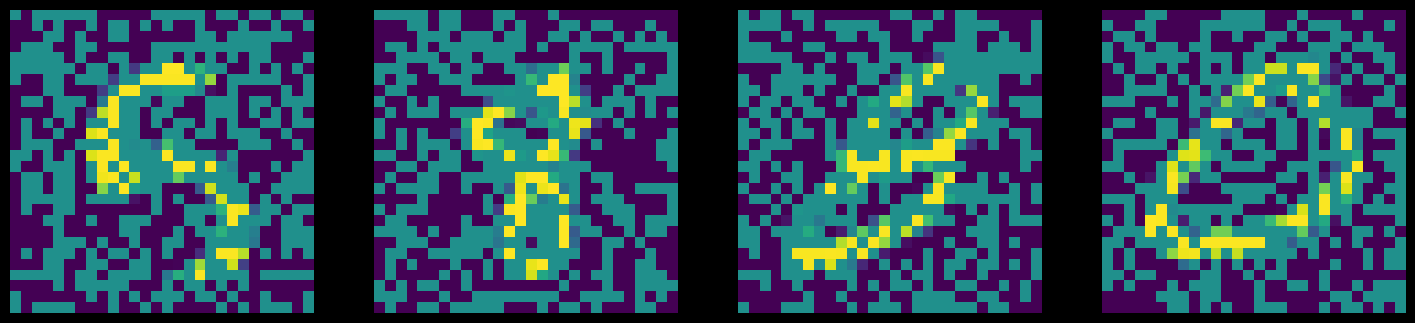

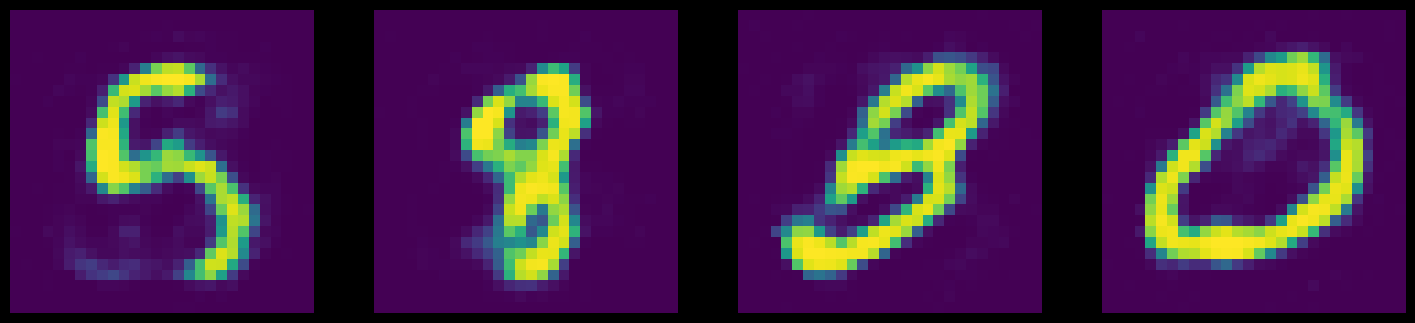

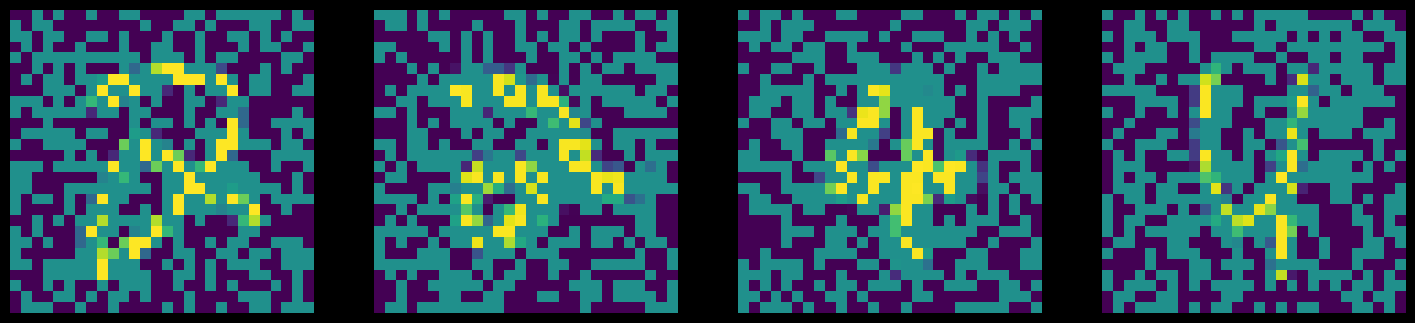

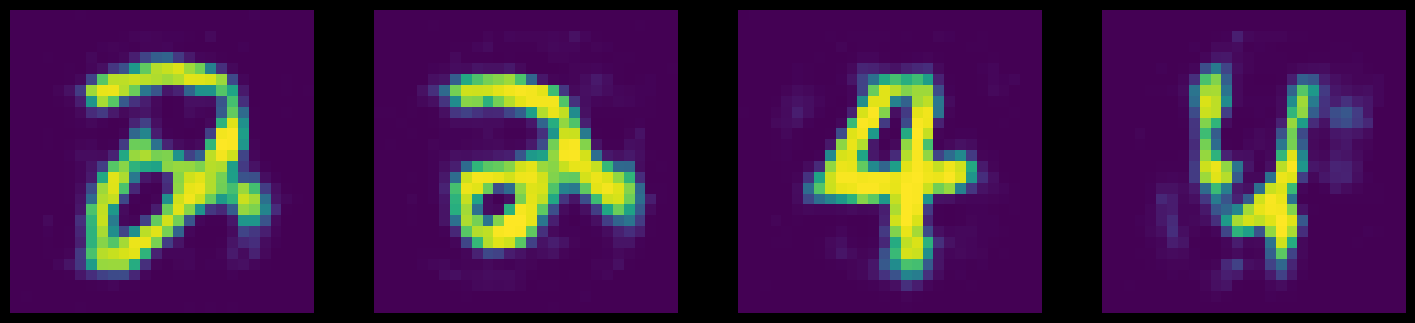

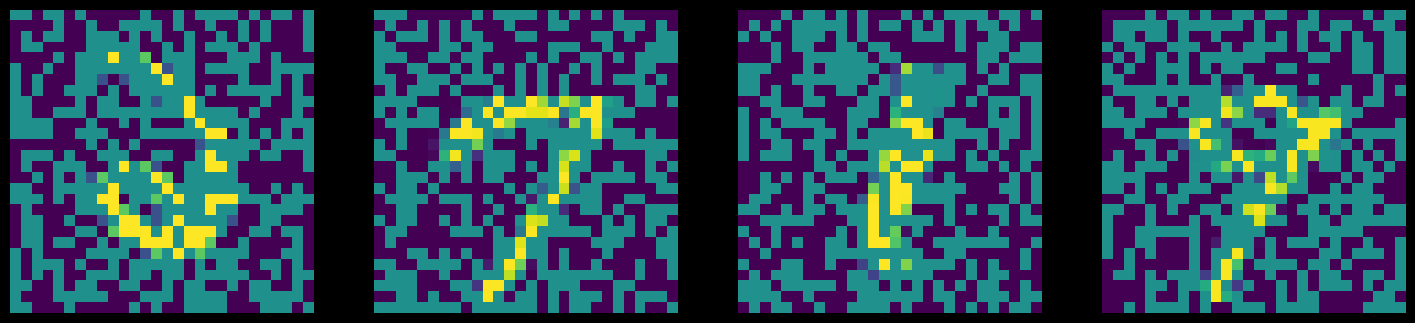

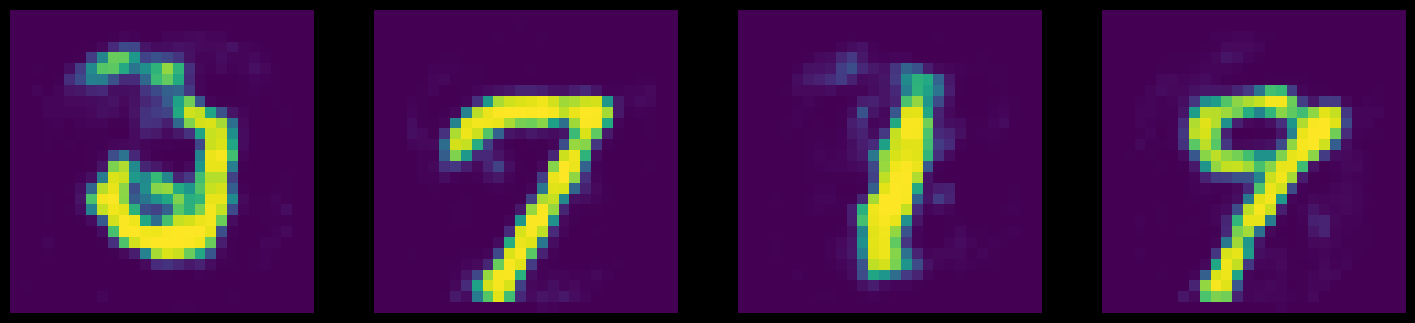

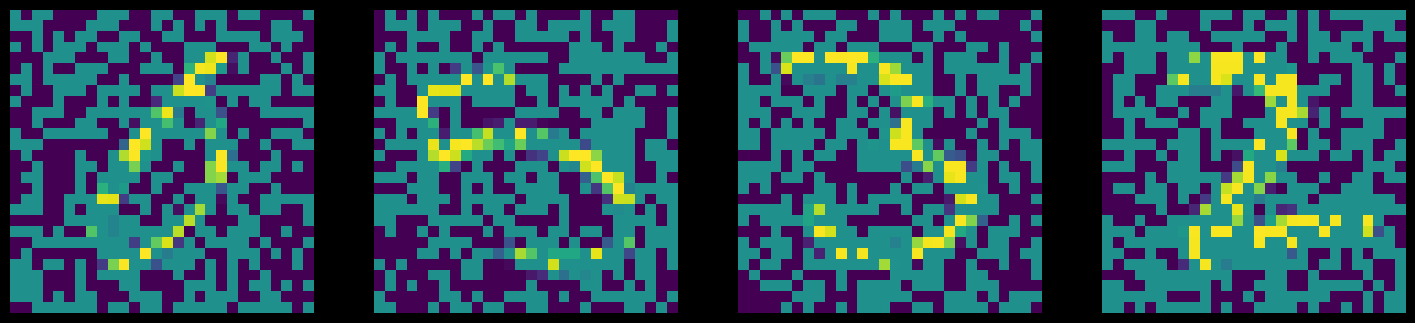

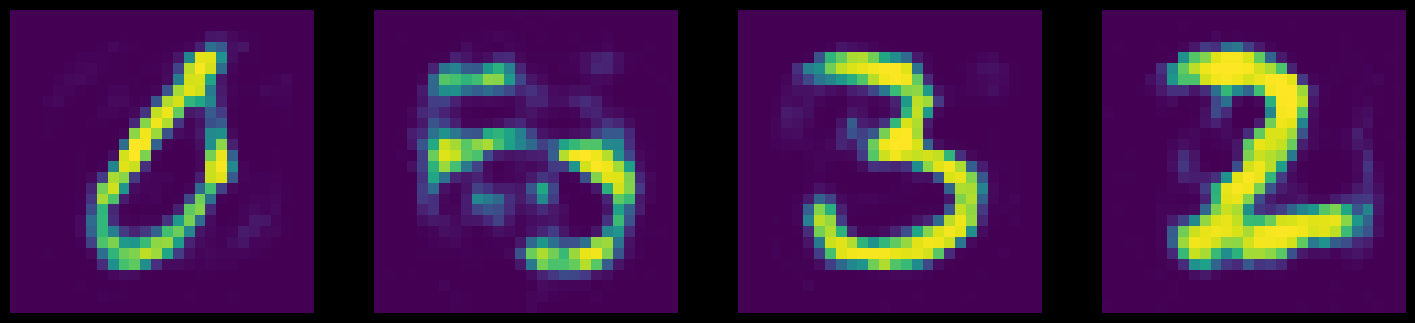

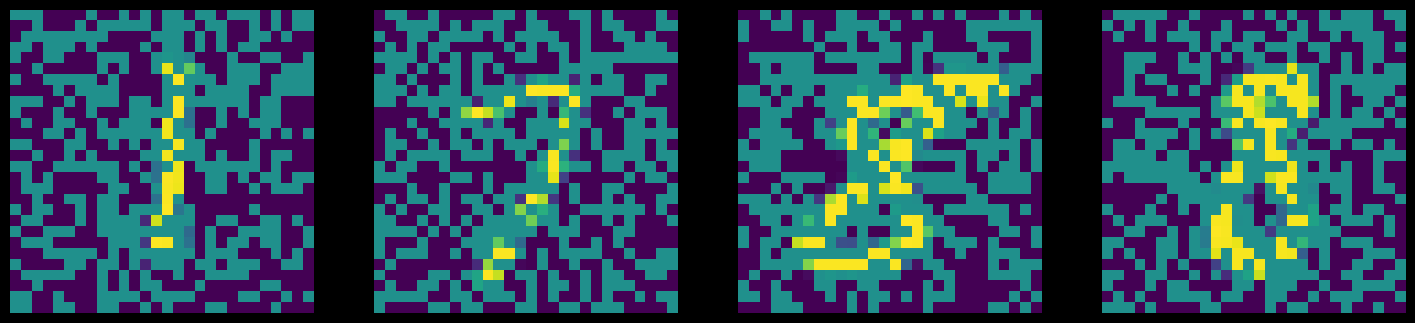

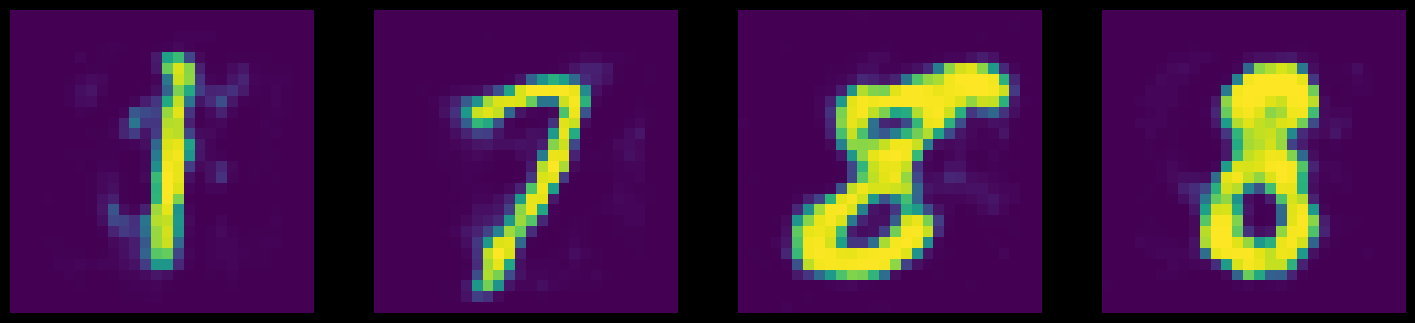

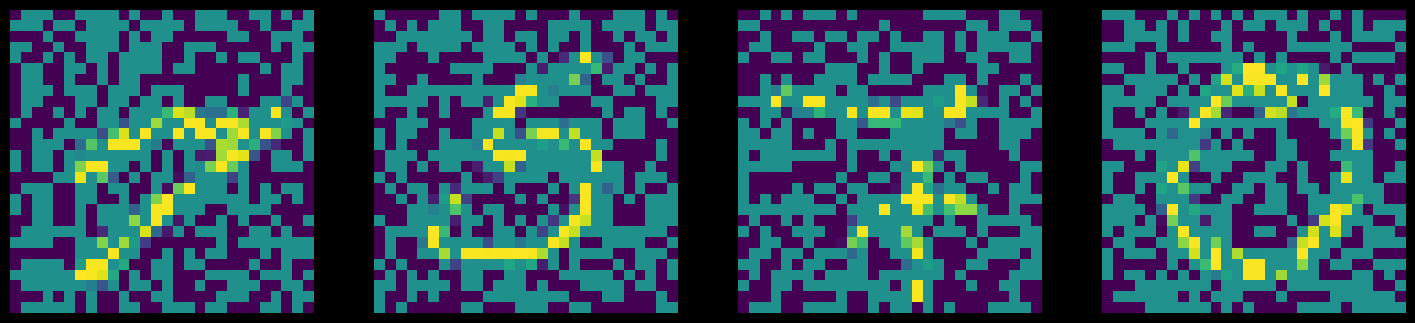

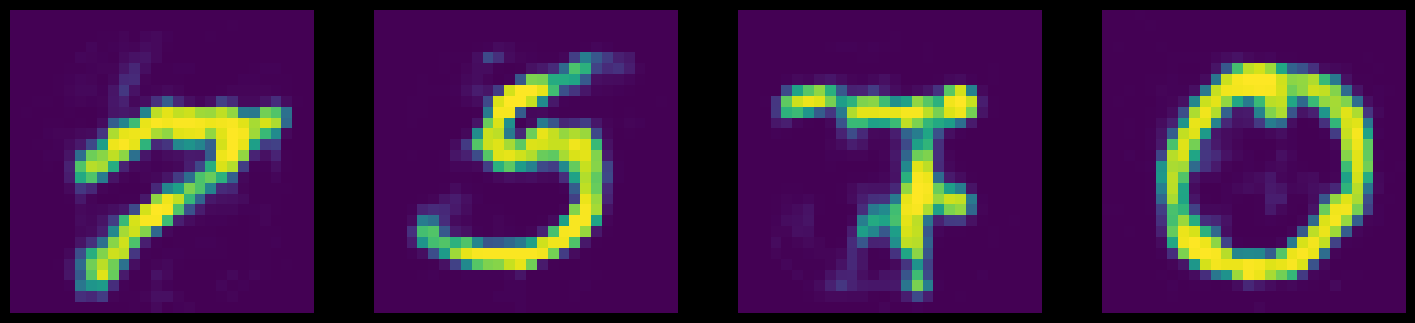

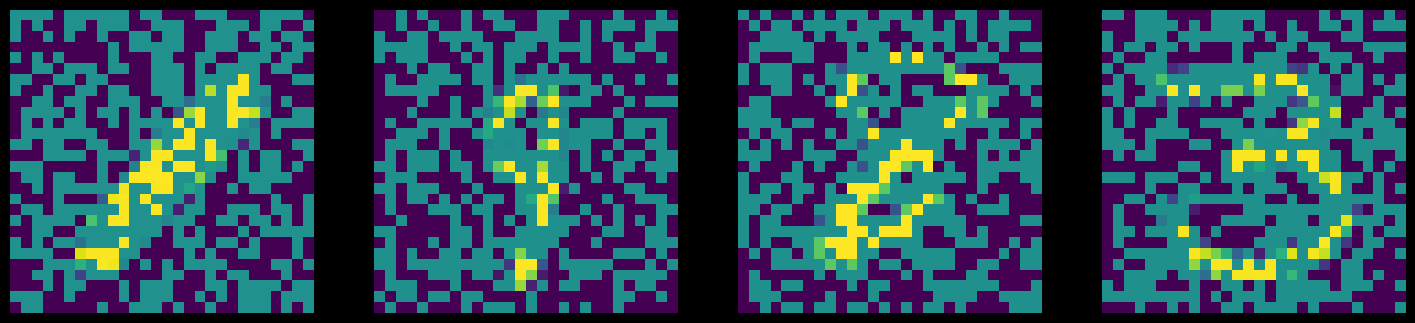

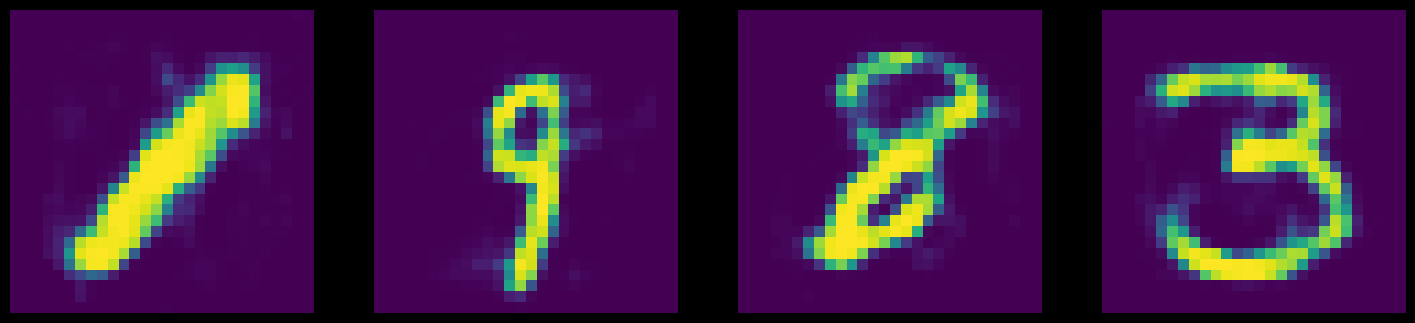

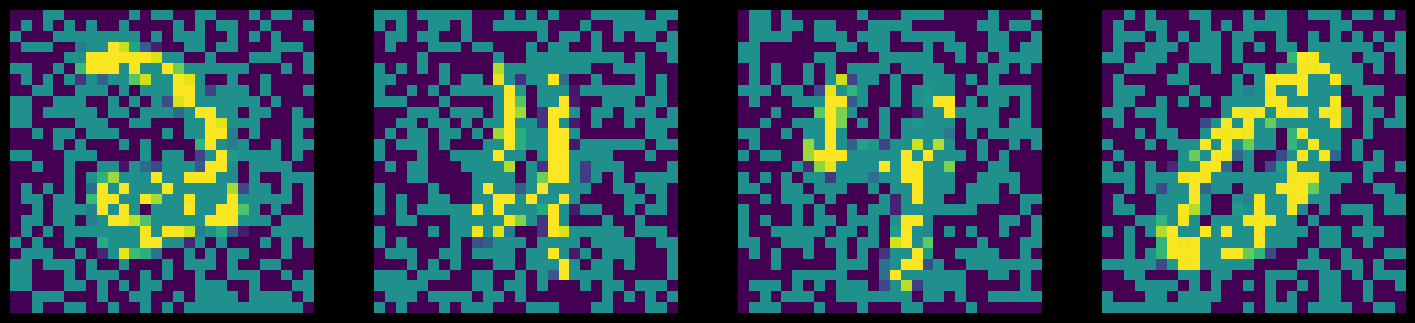

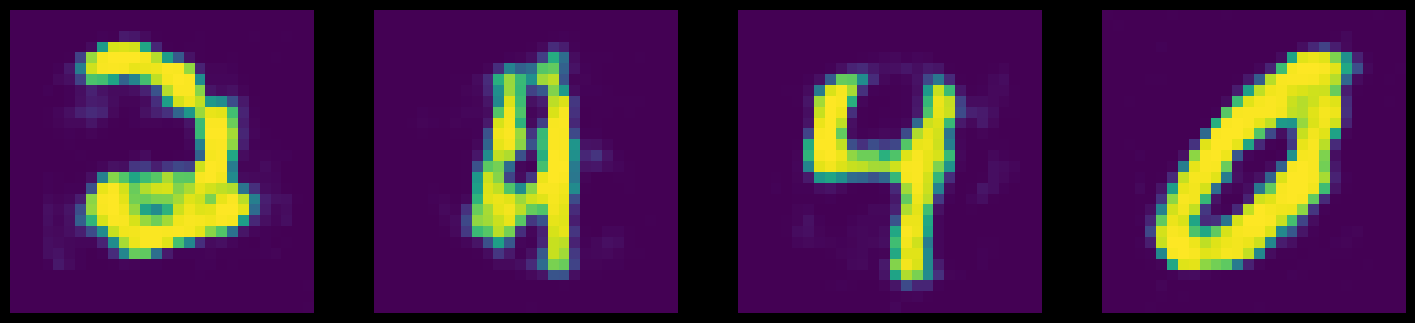

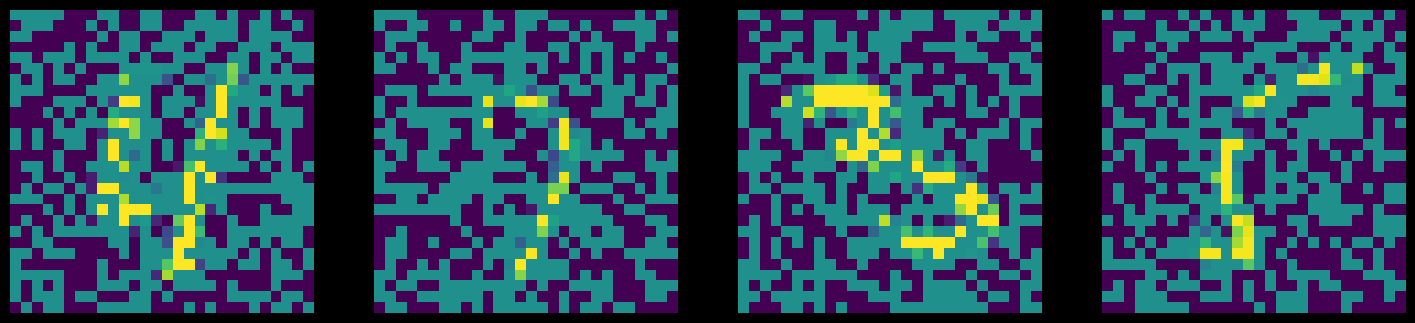

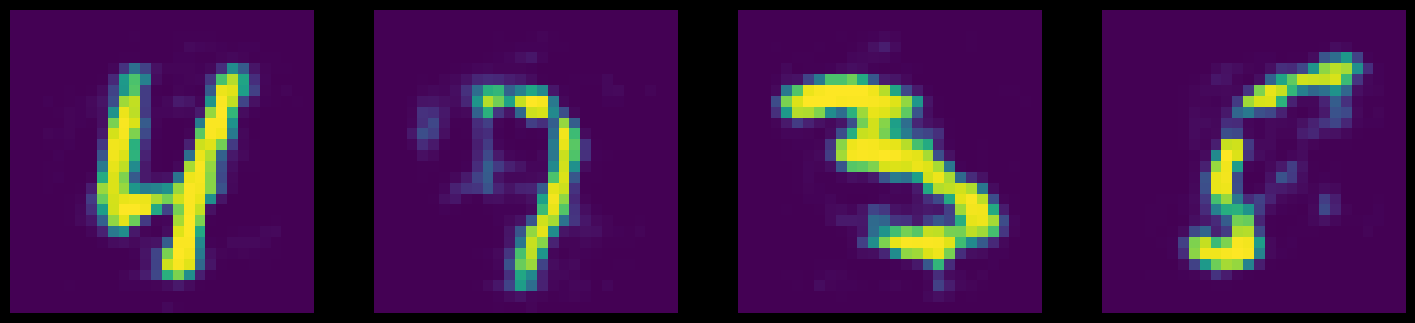

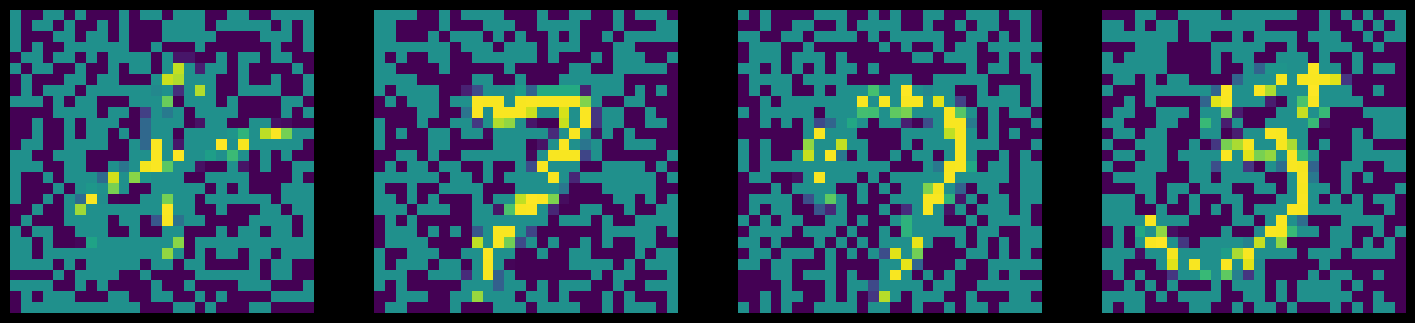

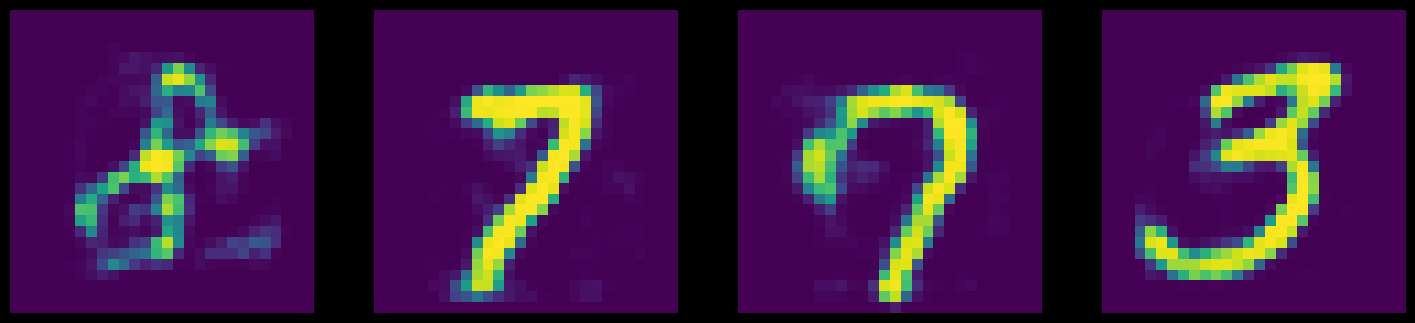

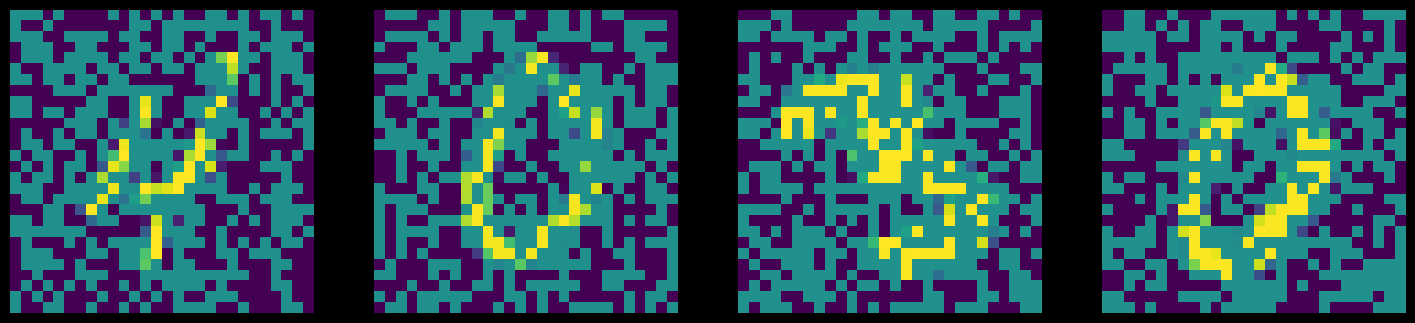

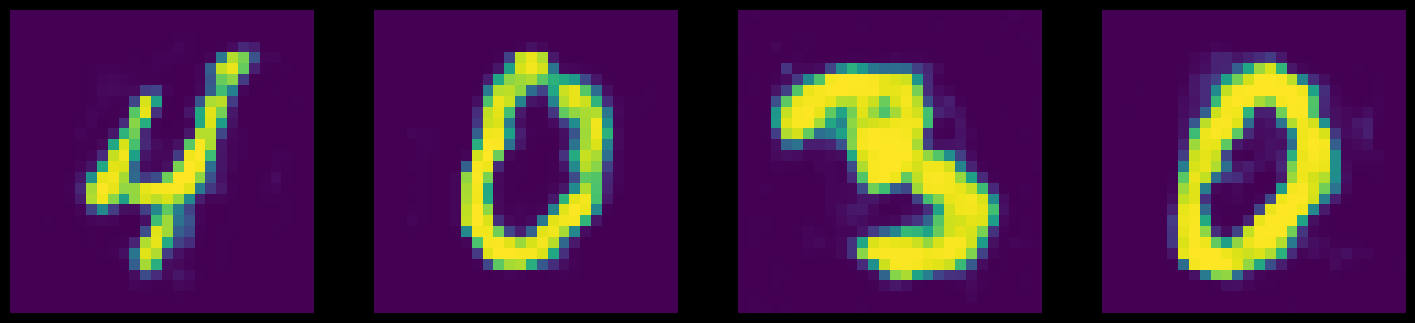

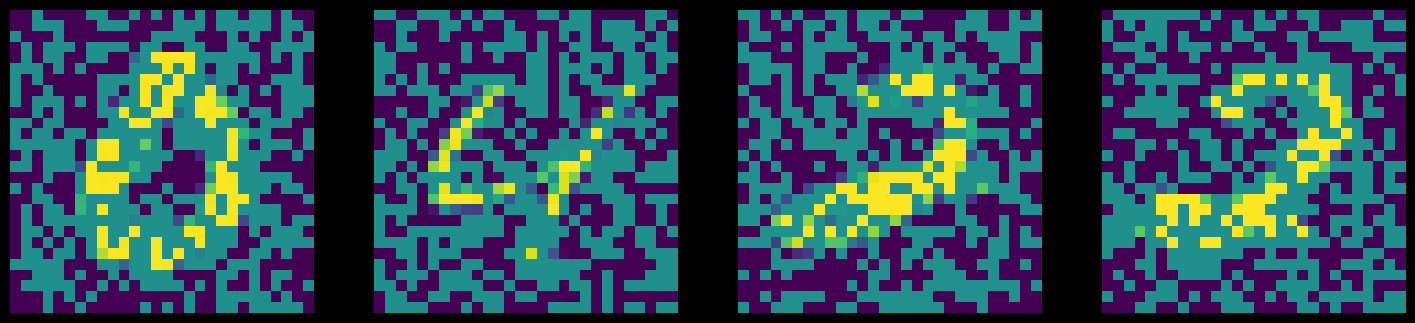

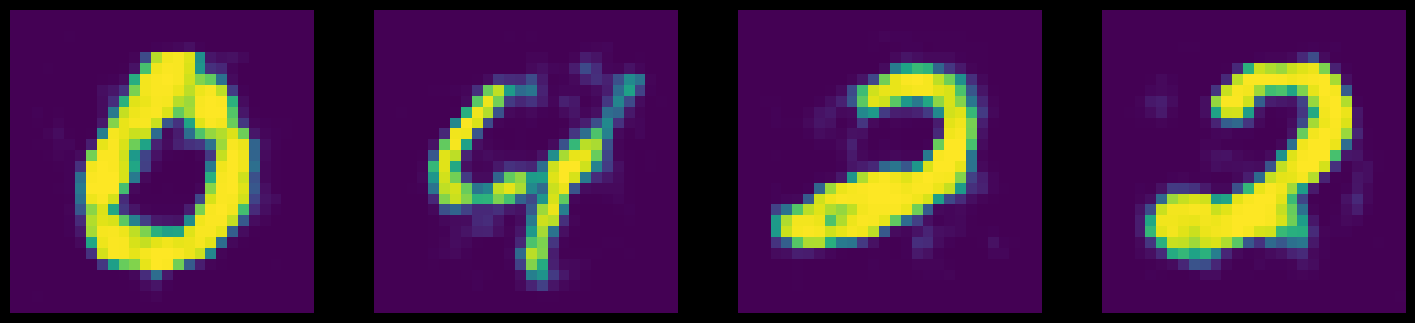

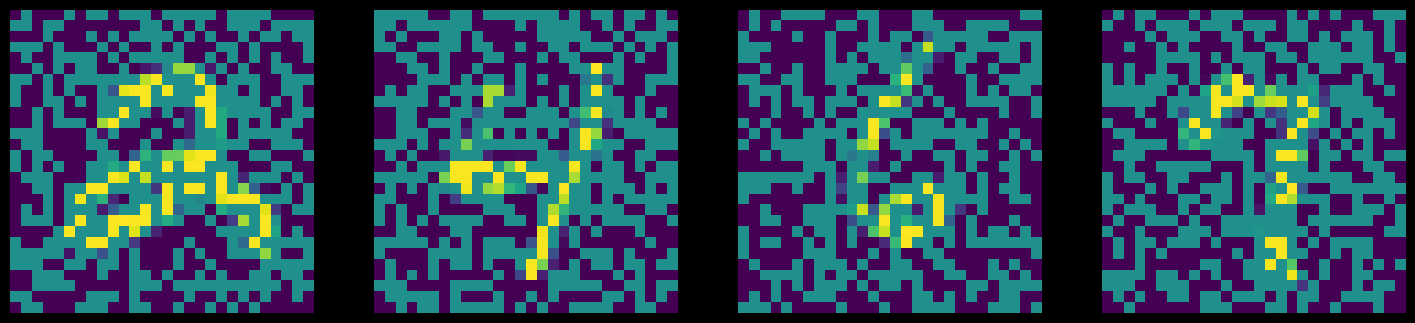

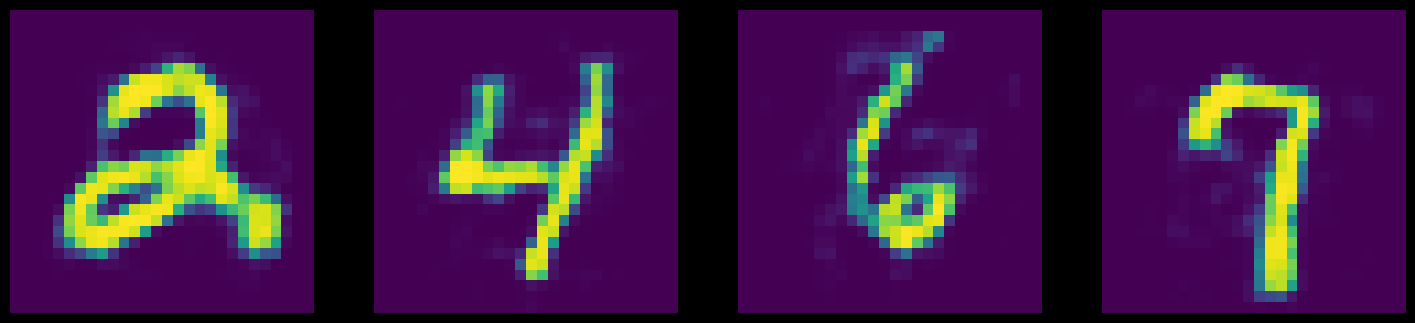

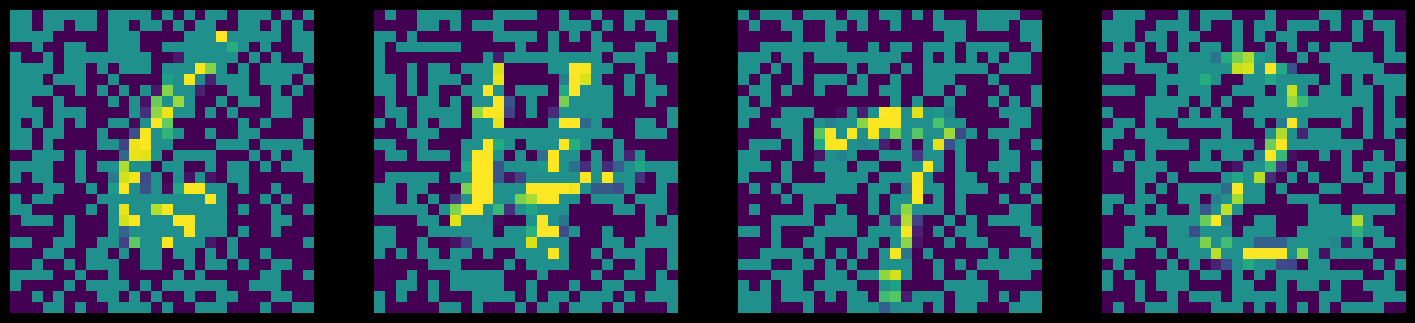

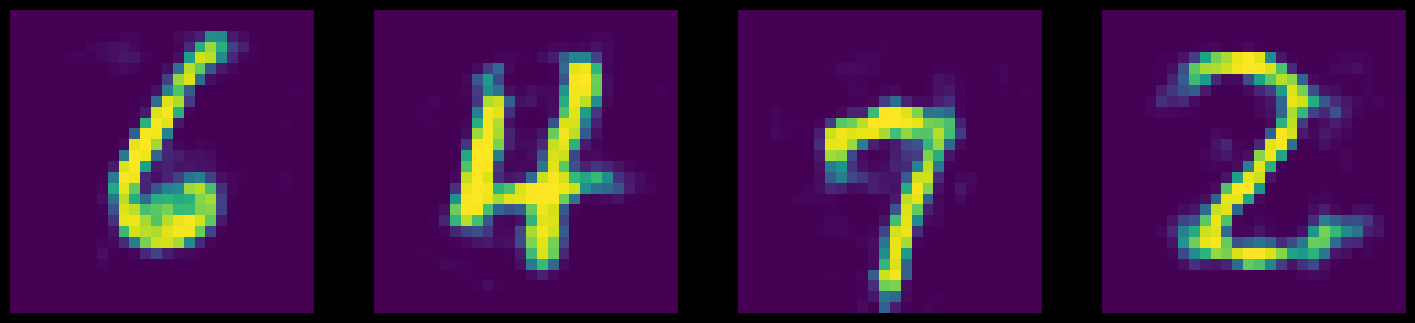

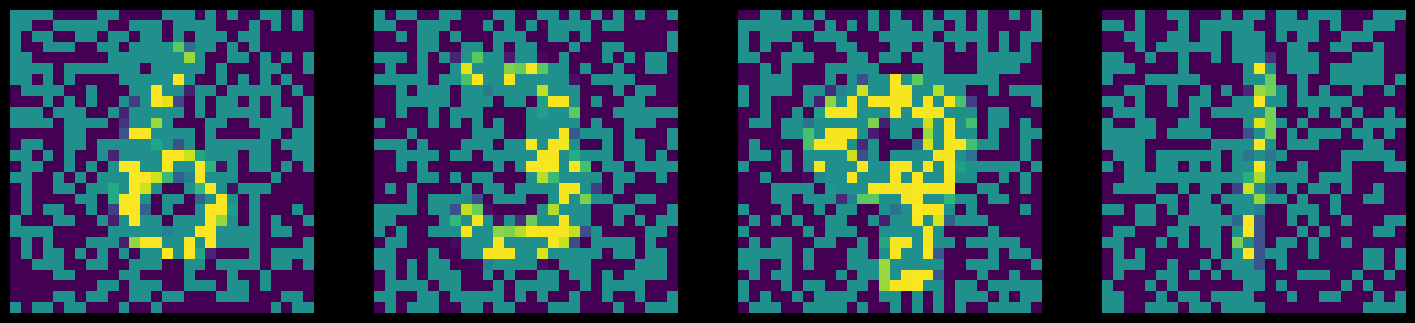

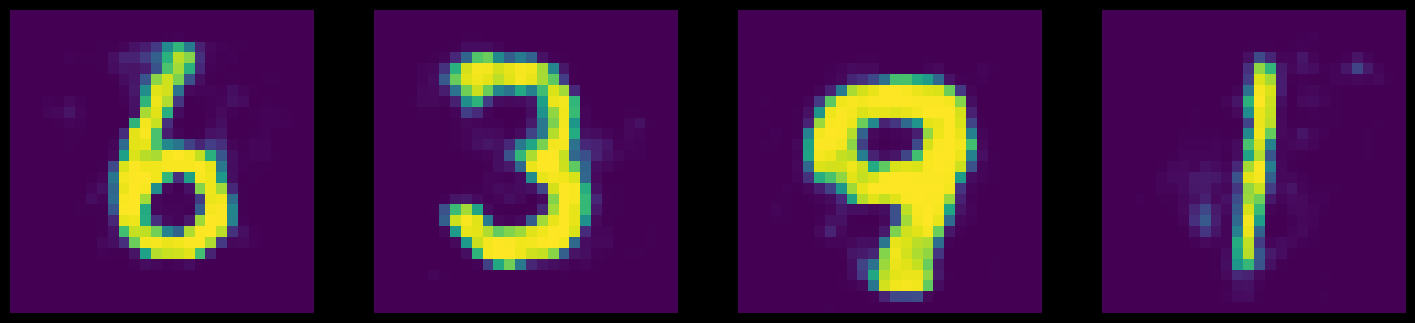

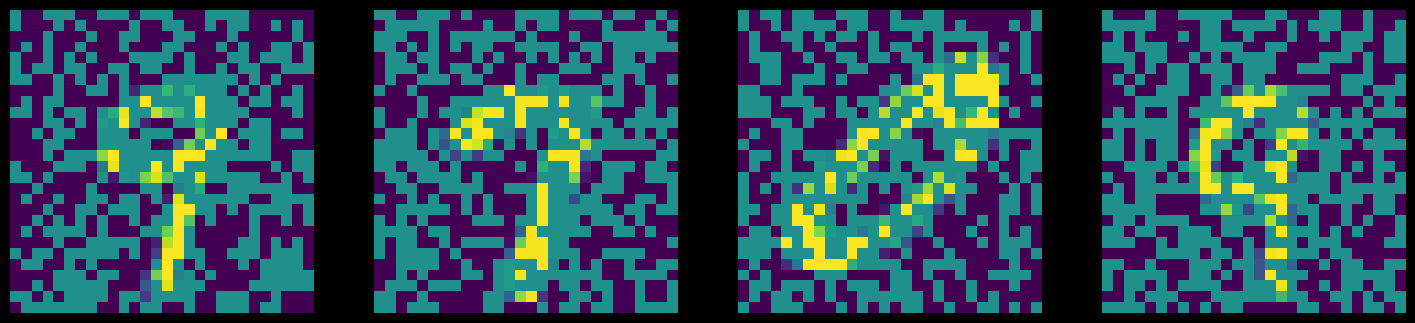

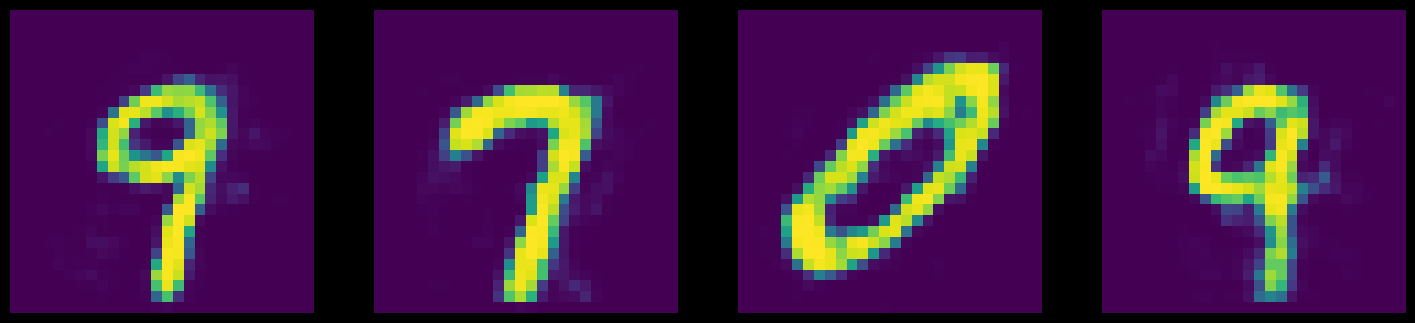

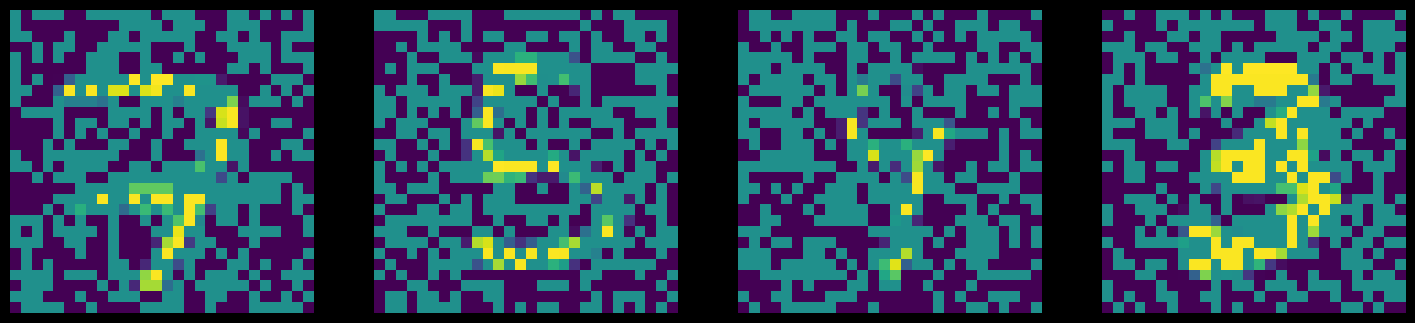

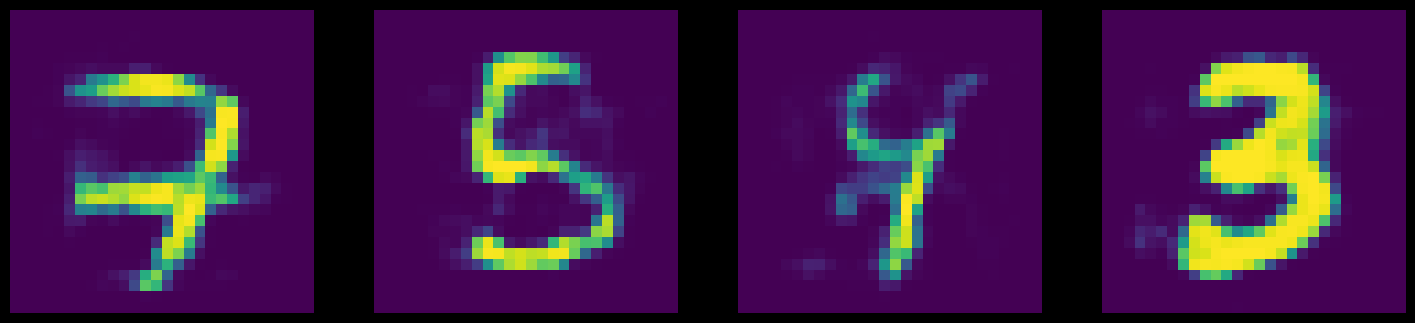

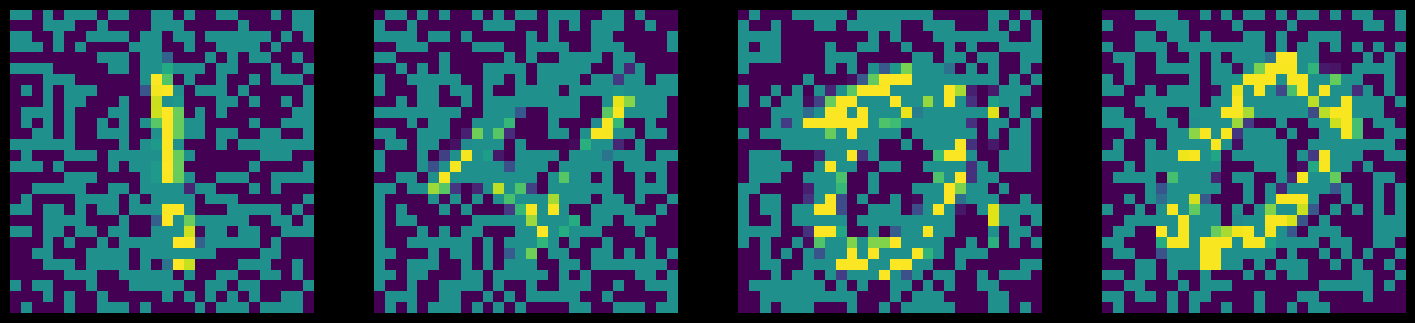

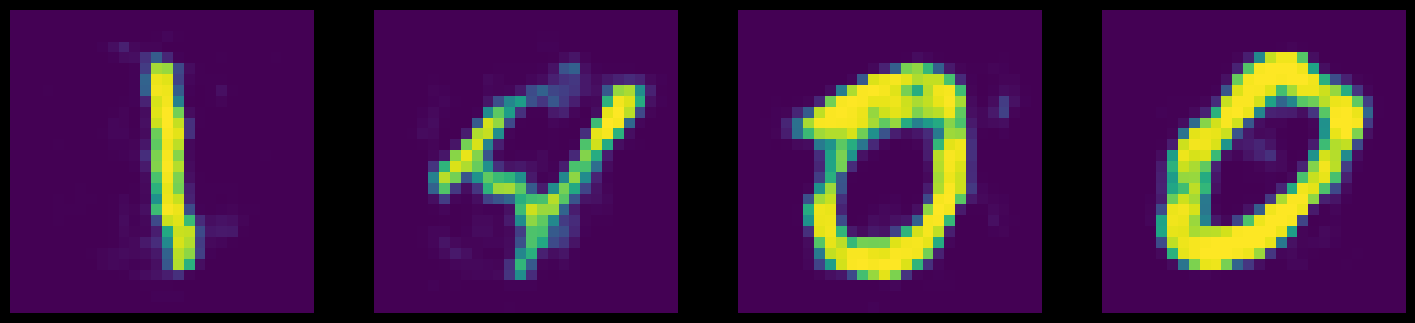

In [13]:
# Train standard or denoising autoencoder (AE)

num_epochs = 20
do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        noise = do(torch.ones(img.shape)).to(device)
        img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img_bad)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(img_bad, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

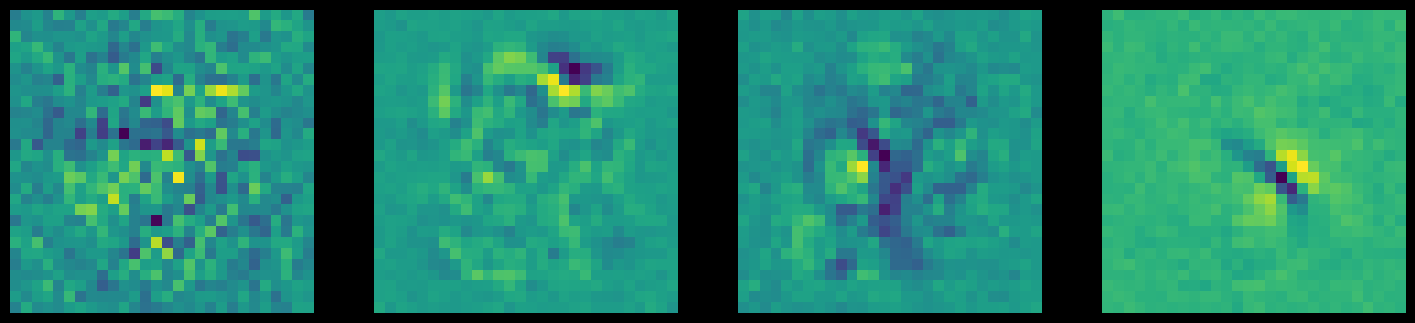

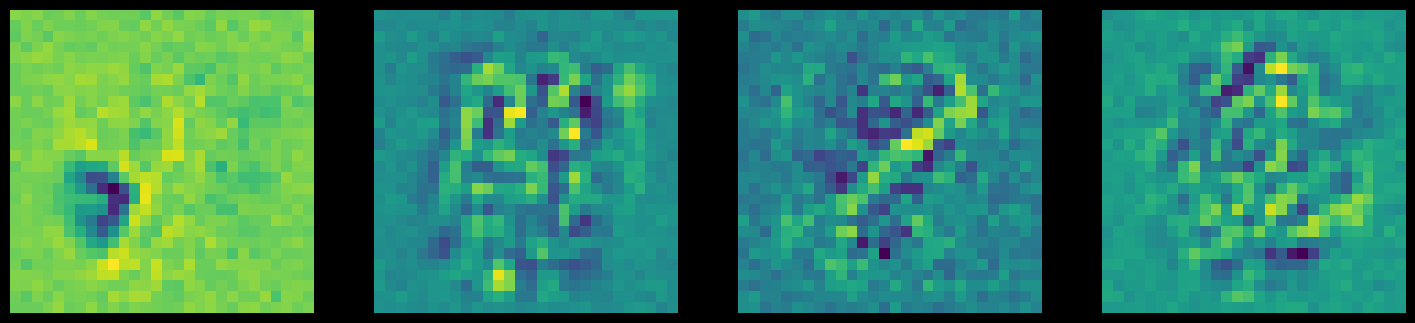

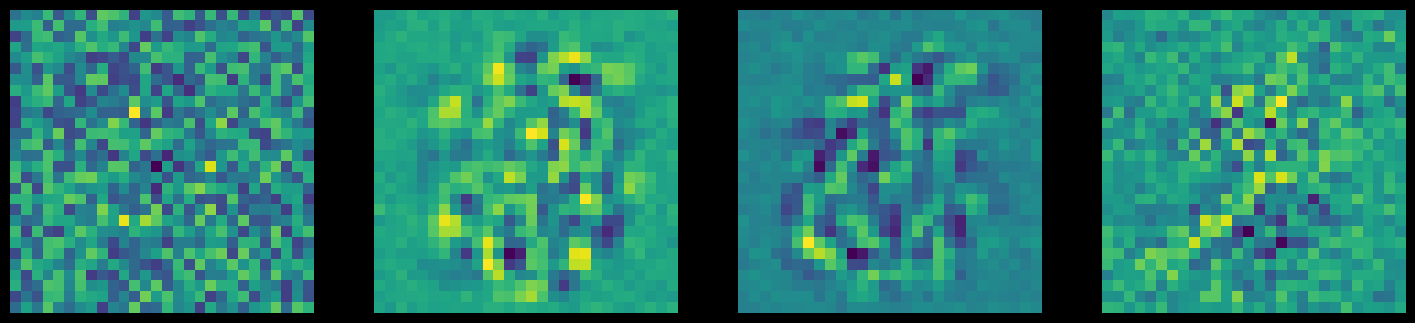

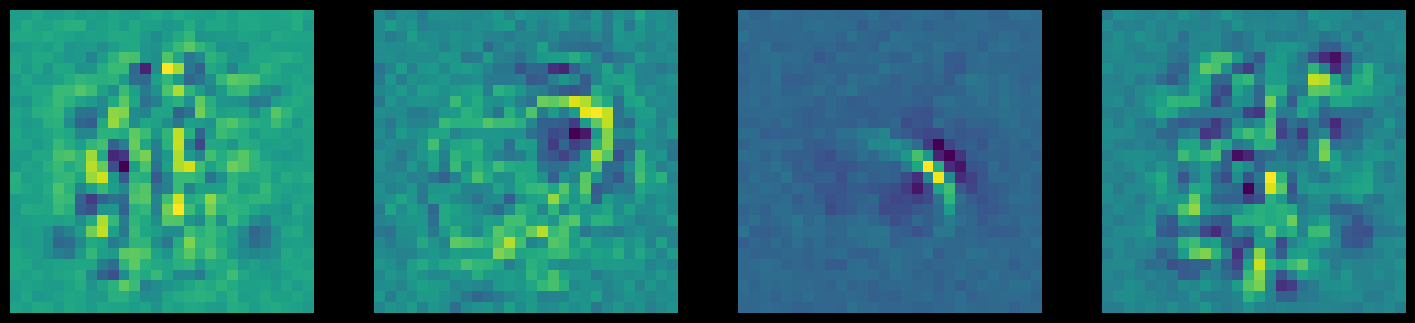

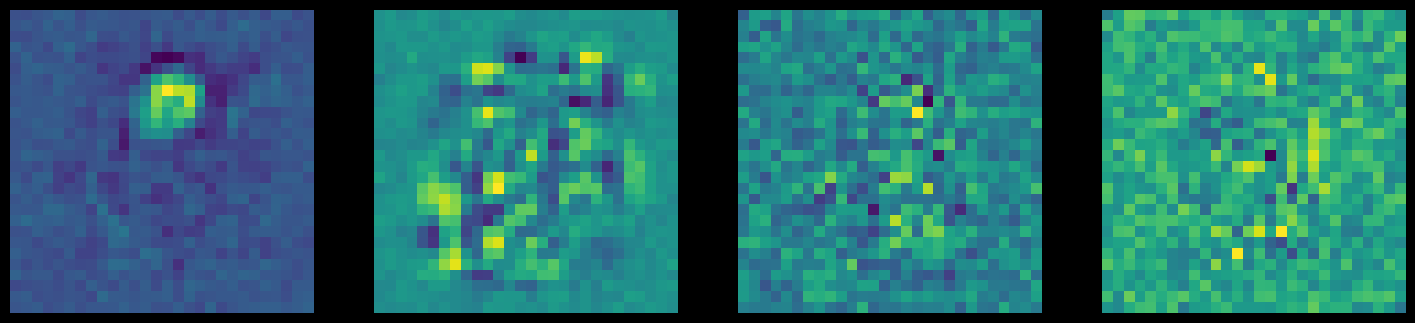

In [14]:
# Visualise a few kernels of the encoder

display_images(None, model.encoder[0].weight, 5)

In [15]:
# Let's compare the autoencoder inpainting capabilities vs. OpenCV
# RUN THIS ONLY AFTER HAVING TRAINED A DENOISING AE!!!

from cv2 import inpaint, INPAINT_NS, INPAINT_TELEA

In [16]:
# Inpaint with Telea and Navier-Stokes methods

dst_TELEA = list()
dst_NS = list()

for i in range(0, 5):
    corrupted_img = ((img_bad.data.cpu()[i].view(28, 28) / 4 + 0.5) * 255).byte().numpy()
    mask = 2 - noise.cpu()[i].view(28, 28).byte().numpy()
    dst_TELEA.append(inpaint(corrupted_img, mask, 3, INPAINT_TELEA))
    dst_NS.append(inpaint(corrupted_img, mask, 3, INPAINT_NS))

tns_TELEA = [torch.from_numpy(d) for d in dst_TELEA]
tns_NS = [torch.from_numpy(d) for d in dst_NS]

TELEA = torch.stack(tns_TELEA).float()
NS = torch.stack(tns_NS).float()

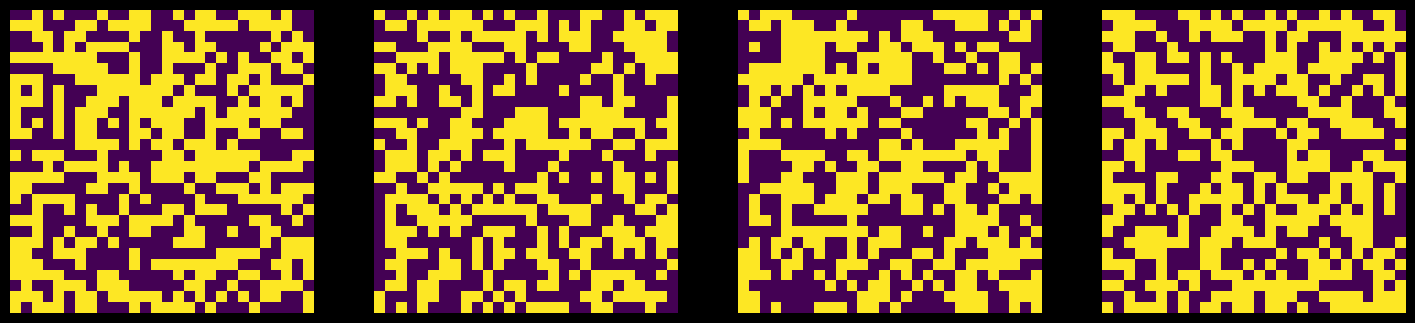

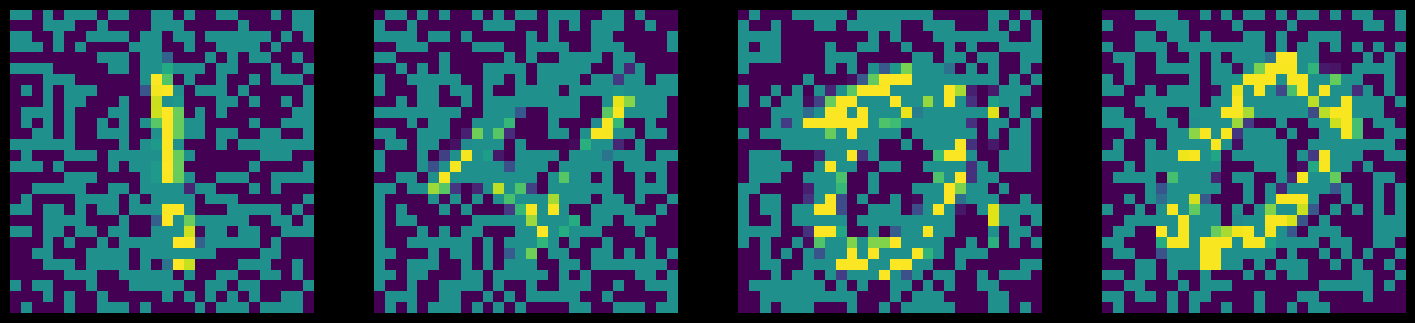

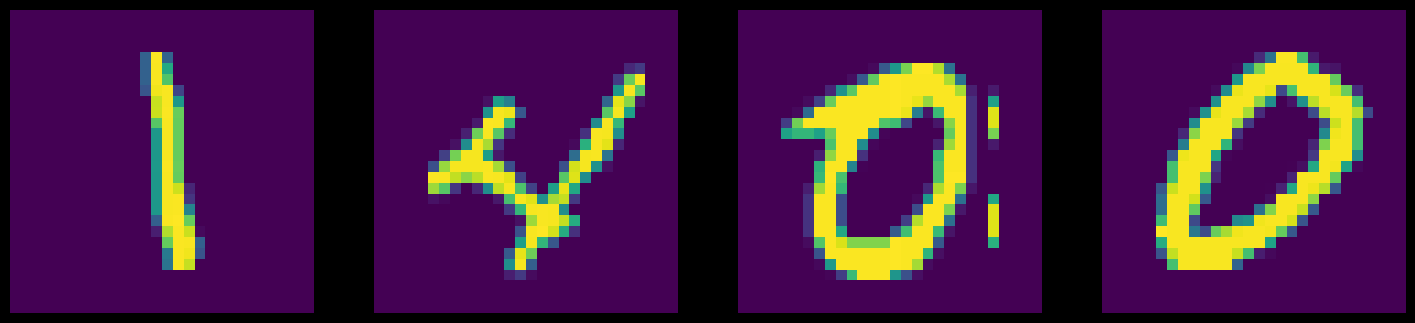

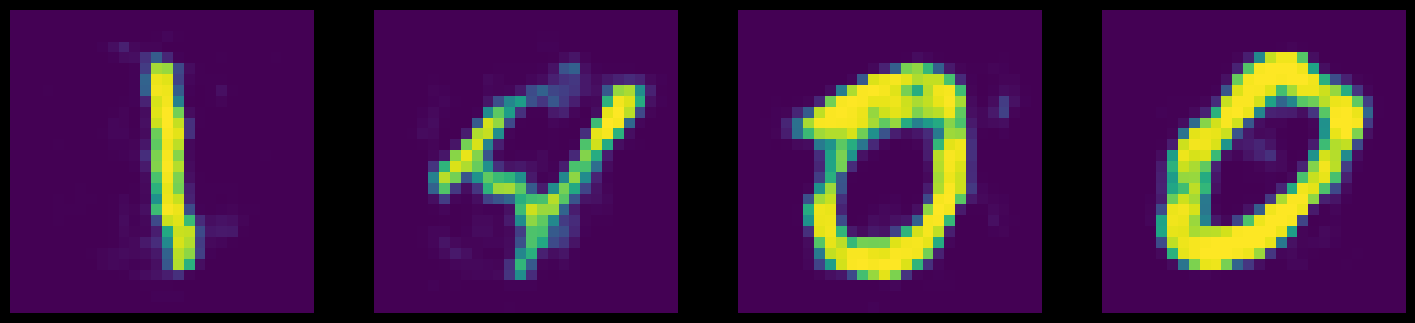

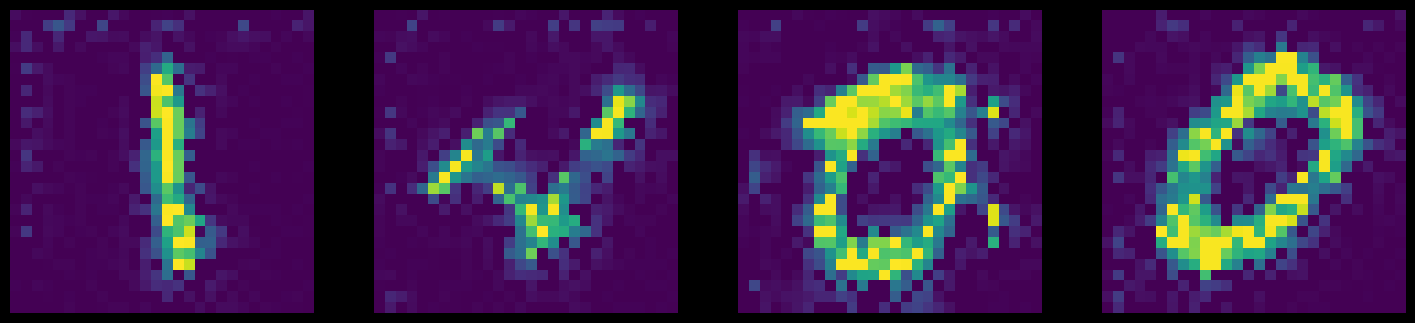

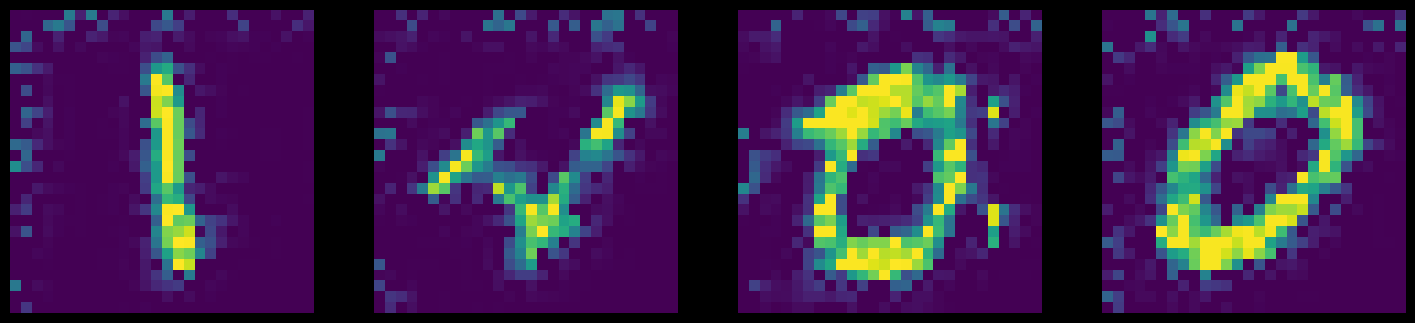

In [17]:
# Compare the results: [noise], [img + noise], [img], [AE, Telea, Navier-Stokes] inpainting

with torch.no_grad():
    display_images(noise[0:5], img_bad[0:5])
    display_images(img[0:5], output[0:5])
    display_images(TELEA, NS)

# Experimenting

The section below needs some more love and refactorin

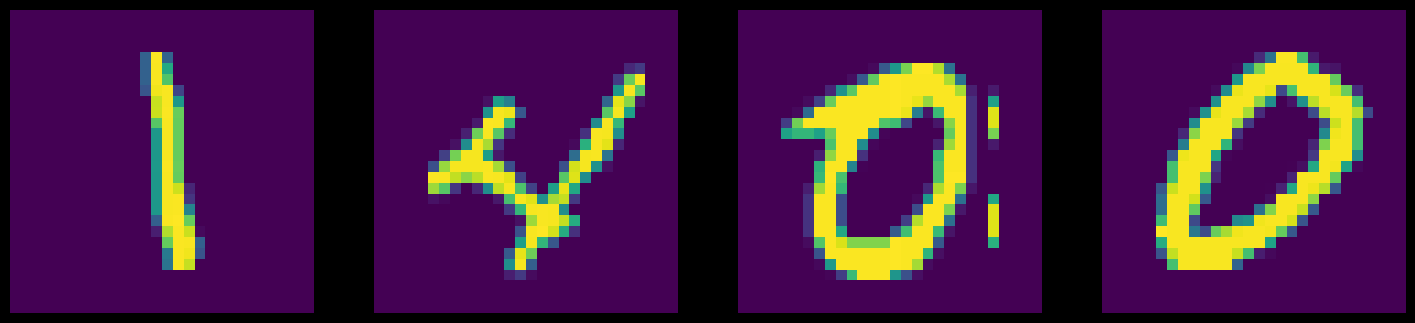

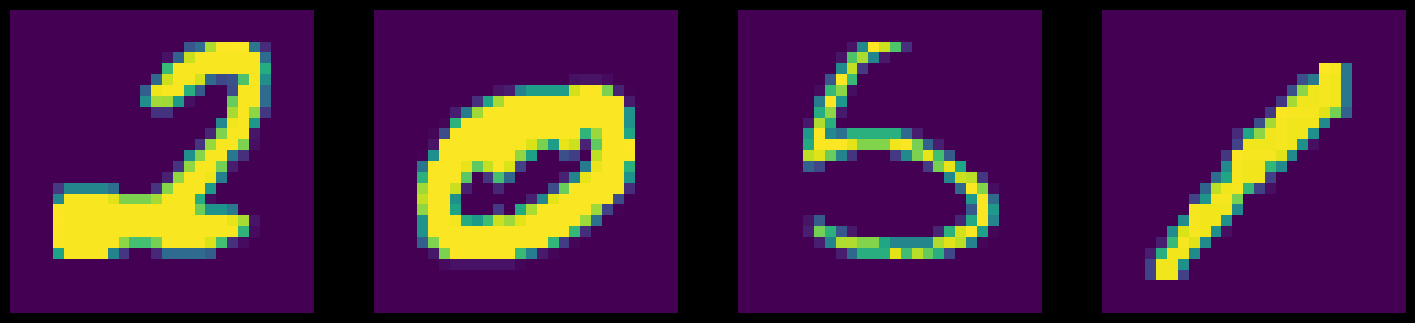

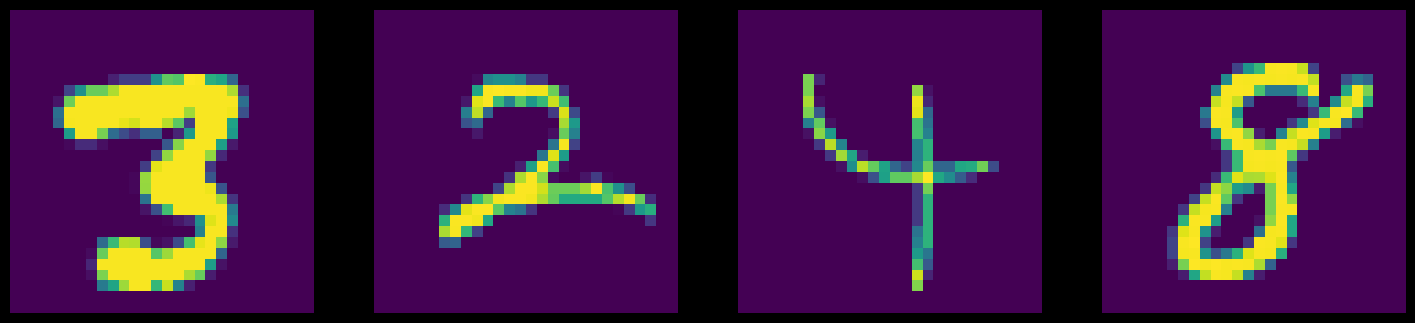

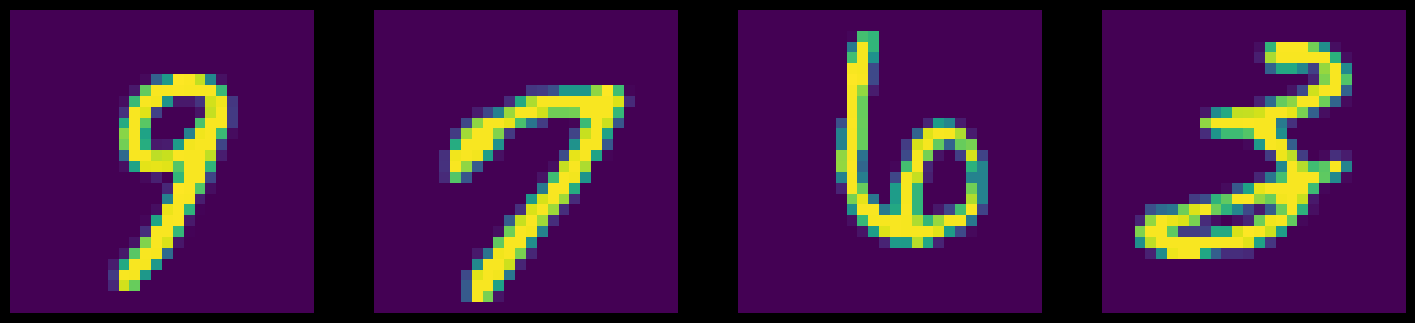

In [18]:
display_images(None, img, n=4)

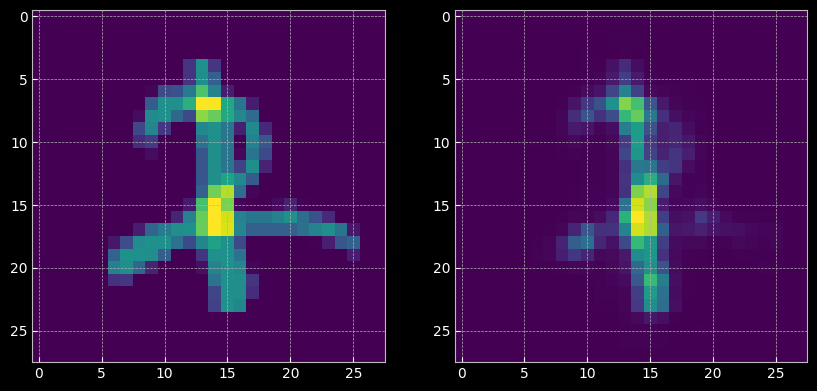

In [19]:
A, B = 0, 9
y = (img[[A]] + img[[B]])/2
with torch.no_grad():
    ỹ = model(y)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(to_img(y).squeeze())
plt.subplot(122)
plt.imshow(to_img(ỹ).squeeze())

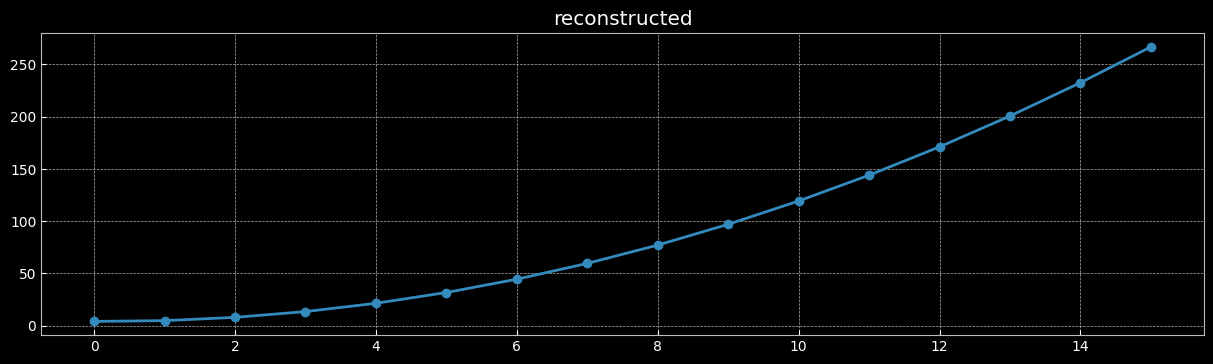

In [21]:
N = 16
samples = torch.Tensor(N, 28 * 28).to(device)
for i in range(N):
    samples[i] = i / (N - 1) * img[B].data + (1 - i / (N - 1) ) * img[A].data
with torch.no_grad():
    reconstructions = model(samples)[0]

plt.title(f'reconstructed')
plt.plot(samples.sub(reconstructions).pow(2).sum(dim=(1)), '-o')